Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


0
total number of paths = 40
path = 0


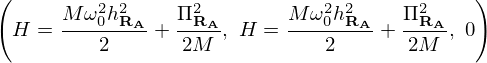

Recon. Time = 0.070498 mins
Avg. Recon. Time = 0.070498 mins
1
total number of paths = 154
path = 0


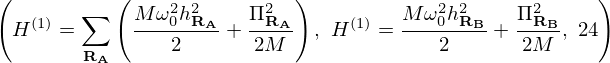

Recon. Time = 0.136183 mins
Avg. Recon. Time = 0.103341 mins
2
total number of paths = 161
path = 0
path = 5
path = 10
path = 15
path = 20


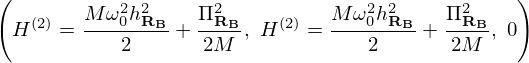

Recon. Time = 0.991803 mins
Avg. Recon. Time = 0.399495 mins
3
total number of paths = 156
path = 0
path = 5
path = 10
path = 15
path = 20
path = 25
path = 30
path = 35
path = 40
path = 45
path = 50
path = 55


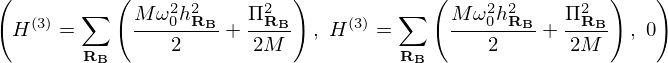

Recon. Time = 3.645522 mins
Avg. Recon. Time = 1.211002 mins
4
total number of paths = 168
path = 0
path = 5
path = 10
path = 15
path = 20
path = 25
path = 30
path = 35
path = 40
path = 45
path = 50


KeyboardInterrupt: 

In [3]:
import time
import itertools
import sympy as sp
import numpy as np
from sympy.vector import dot
from sympy.physics.quantum import Commutator, Operator
from sympy.interactive import printing
from sympy.vector import CoordSys3D
from random import shuffle
import pandas as pd
import editdistance
import jellyfish
import matplotlib.pyplot as plt
printing.init_printing(use_latex = True)


def M(state1, state2, letter):
    s1 = str(state1)
    s2 = str(state2)
    if letter == "L":
        return jellyfish.levenshtein_distance(s1, s2)
    elif letter == 'LD':
        return jellyfish.damerau_levenshtein_distance(s1, s2)
    elif letter == 'H':
        return jellyfish.hamming_distance(s1, s2)
    elif letter == 'J':
        return round(1 - jellyfish.jaro_similarity(s1, s2), 4)
    elif letter == 'JW':
        return round(1 - jellyfish.jaro_winkler_similarity(s1, s2), 4)


def experiment(TUPLE):
    
    EPSILON, LETTER = TUPLE
    
    Pi_RA, M, w_0, h_RA, p, m, w, x, H, Pi_RB, h_RB, h_RS, Q, h, zhat = sp.symbols('\\Pi_{\\mathbf{R_A}}, M, \\omega_0, h_{\\mathbf{R_A}}, p, m, \\omega, x, H, \\Pi_{\\mathbf{R_B}}, h_{\\mathbf{R_B}}, h_{\\mathbf{R_S}}, Q, \\mathbf{h} \\hat{\\mathbf{z}}')
    V, p1, p2, nhat, r1, r2, eps0, hbar = sp.symbols('V \\mathbf{p} \\mathbf{p^\prime} \\hat{\\mathbf{n}} \\mathbf{r} \\mathbf{r^\prime} \epsilon_0 \\hbar')
    N = CoordSys3D('N')
    a = sp.Symbol('a', real = True, positive = True)

    R = [((H, p**2/(2*m) + w**2*m*x**2/2), ('hamiltonian', H), ('momentum', p), ('mass', m), ('angular frequency', w), ('displacement', x)), 
        ((sp.Symbol('\\mathbf{p}'),-Q*h*nhat), ('dipole moment', sp.Symbol('\\mathbf{p}')), ('charge', Q), ('displacement', h), ('unit vector', nhat)),
        ((V, (dot(p1, p2) - 3*dot(p1,nhat)*dot(p2,nhat))/(4*sp.pi*eps0*sp.Abs(r1 - r2)**3)), ('potential energy', V), ('dipole moment', p1, p2), ('unit vector', nhat), ('displacement', r1, r2)),
        ((nhat, (r1 - r2)/sp.Abs(r1 - r2)), ('unit vector', nhat), ('displacement', r1, r2)),
        ((Operator('a'), sp.sqrt(m*w/(2*hbar))*x + sp.I*sp.sqrt(1/(2*hbar*m*w))*p), ('annihilation operator', Operator('a')), ('mass', m), ('angular frequency', w), ('displacement', x), ('momentum', p)),
        ((Operator('a^{\\dagger}'), sp.sqrt(m*w/(2*hbar))*x - sp.I*sp.sqrt(1/(2*hbar*m*w))*p), ('creation operator', Operator('a^{\\dagger}')), ('mass', m), ('angular frequency', w), ('displacement', x), ('momentum', p)),
        ((Commutator(Operator('a'), Operator('a^{\\dagger}')), sp.Number(1)), ('annihilation operator', Operator('a')), ('creation operator', Operator('a^{\\dagger}'))),
        ((Operator('N^{\\dagger}'), Operator('a')*Operator('a^{\\dagger}')), ('number operator', (Operator('N^{\\dagger}')), ('annihilation operator', Operator('a')), ('creation operator', Operator('a^{\\dagger}')))), 
        ((Operator('a_{\\mathbf{R}}'), (1/sp.sqrt(sp.Symbol('N')))*sp.Symbol('\\sum_{\\mathbf{q}}')*Operator('a_{\\mathbf{q}}')*sp.exp(sp.I*dot(sp.Symbol('\\mathbf{q}'), sp.Symbol('\\mathbf{R}')))), ('annihilation operator', Operator('a_{\\mathbf{R}}'), Operator('a_{\\mathbf{q}}')), ('displacement', sp.Symbol('\\mathbf{R}')), ('wavevector', sp.Symbol('\\mathbf{q}'))), 
        ((Operator('a_{\\mathbf{R}}^{\\dagger}'), (1/sp.sqrt(sp.Symbol('N')))*sp.Symbol('\\sum_{\\mathbf{q}}')*Operator('a_{\\mathbf{q}}^{\\dagger}')*sp.exp(-sp.I*dot(sp.Symbol('\\mathbf{q}'), sp.Symbol('\\mathbf{R}')))), ('creation operator', Operator('a_{\\mathbf{R}}^{\\dagger}'), Operator('a_{\\mathbf{q}}^{\\dagger}')), ('displacement', sp.Symbol('\\mathbf{R}')), ('wavevector', sp.Symbol('\\mathbf{q}'))), 
        ((Operator('\\delta_{\\mathbf{q},\\mathbf{q^\\prime}}'), sp.Symbol('\\sum_{\\mathbf{R}}')*sp.exp(sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q}'),sp.Symbol('\\mathbf{R}')))*sp.exp(-sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q^\\prime}'),sp.Symbol('\\mathbf{R}')))/sp.Symbol('N')), ('number', sp.Symbol('N')), ('dirac delta', Operator('\\delta_{\\mathbf{q}\\mathbf{q^\\prime}}')), ('wavevector', sp.Symbol('\\mathbf{q}'), sp.Symbol('\\mathbf{q^\\prime}')), ('displacement', sp.Symbol('\\mathbf{R}')), ('summation sign', sp.Symbol('\\sum_{\\mathbf{R}}'))), 
        ((Operator('\\delta_{\\mathbf{q},\\mathbf{q^\\prime}}'), sp.Symbol('\\sum_{\\mathbf{R}}')*sp.exp(-sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q}'),sp.Symbol('\\mathbf{R}')))*sp.exp(sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q^\\prime}'),sp.Symbol('\\mathbf{R}')))/sp.Symbol('N')), ('number', sp.Symbol('N')), ('dirac delta', Operator('\\delta_{\\mathbf{q}\\mathbf{q^\\prime}}')), ('wavevector', sp.Symbol('\\mathbf{q}'), sp.Symbol('\\mathbf{q^\\prime}')), ('displacement', sp.Symbol('\\mathbf{R}')), ('summation sign', sp.Symbol('\\sum_{\\mathbf{R}}'))),
        ((Operator('\\delta_{-\\mathbf{q},\\mathbf{q^\\prime}}'), sp.Symbol('\\sum_{\\mathbf{R}}')*sp.exp(sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q}'),sp.Symbol('\\mathbf{R}')))*sp.exp(sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q^\\prime}'),sp.Symbol('\\mathbf{R}')))/sp.Symbol('N')), ('number', sp.Symbol('N')), ('dirac delta', Operator('\\delta_{\\mathbf{q}\\mathbf{q^\\prime}}')), ('wavevector', sp.Symbol('\\mathbf{q}'), sp.Symbol('\\mathbf{q^\\prime}')), ('displacement', sp.Symbol('\\mathbf{R}')), ('summation sign', sp.Symbol('\\sum_{\\mathbf{R}}'))),
        ((Operator('\\delta_{-\\mathbf{q},\\mathbf{q^\\prime}}'), sp.Symbol('\\sum_{\\mathbf{R}}')*sp.exp(-sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q}'),sp.Symbol('\\mathbf{R}')))*sp.exp(-sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q^\\prime}'),sp.Symbol('\\mathbf{R}')))/sp.Symbol('N')), ('number', sp.Symbol('N')), ('dirac delta', Operator('\\delta_{\\mathbf{q}\\mathbf{q^\\prime}}')), ('wavevector', sp.Symbol('\\mathbf{q}'), sp.Symbol('\\mathbf{q^\\prime}')), ('displacement', sp.Symbol('\\mathbf{R}')), ('summation sign', sp.Symbol('\\sum_{\\mathbf{R}}')))]

    S_sys = (('displacement', h_RA, h_RB, h_RS, sp.Symbol('\\mathbf{R_A}'), sp.Symbol('\\mathbf{R_B}'), sp.Symbol('\\mathbf{R_S}')), ('momentum', Pi_RA, Pi_RB), ('mass', M), ('angular frequency', w_0),
            ('dipole moment', sp.Symbol('\\mathbf{p_{R_A}}'), sp.Symbol('\\mathbf{p_{R_B}}'), sp.Symbol('\\mathbf{p_{R_S}}')), ('unit vector', nhat, sp.Symbol('\\hat{\\mathbf{z}}')),
            ('annihilation operator', Operator('a_{\\mathbf{R_A}}'), Operator('b_{\\mathbf{R_B}}'), Operator('a_{\\mathbf{q}}'), Operator('b_{\\mathbf{q}}')),
            ('creation operator', Operator('a_{\\mathbf{R_A}}^{\\dagger}'), Operator('b_{\\mathbf{R_B}}^{\\dagger}'), Operator('a_{\\mathbf{q}}^{\\dagger}'), Operator('b_{\\mathbf{q}}^{\\dagger}')), 
            ('number operator', Operator('N^{\\dagger}')), ('number', sp.Symbol('N')), ('summation sign', sp.Symbol('\\sum_{j=1}^3'), sp.Symbol('\\sum_{\\mathbf{R_A}}'), sp.Symbol('\\sum_{\\mathbf{R_B}}'), sp.Symbol('\\sum_{\\mathbf{R_S}}'), sp.Symbol('\\sum_{\\mathbf{q}}'), sp.Symbol('{\\sum^\\prime}_{l = -\\infty}^{\\infty}')))

    R_eq = [i[0] for i in R]

    pairs = []
    for i in R:
        for j in i[1:]:
            for k in S_sys:
                if j[0] == k[0]:
                    for l in j[1:]:
                        for n in k[1:]:
                            pair = (l, n)
                            pairs.append(pair) if pair not in pairs else 0             
    R_eq_syms = []
    for i,j in R_eq:
        R_eq_syms.append(list(i.atoms(sp.Symbol)) + list(j.atoms(sp.Symbol)))
    R_eq_pairs = [[] for i in R_eq]
    for i,j in pairs:
        for k in range(len(R_eq_syms)):
            for l in R_eq_syms[k]:
                if str(i) == str(l):
                    R_eq_pairs[k].append((i,j))

    S_match = []
    for k in R_eq_pairs:
        tree = {}
        for i,j in k:
            if i not in tree:
                tree[i] = []
            tree[i].append((i,j))
        S_match.append(list(itertools.product(*tree.values())))
    
    def f_match(eq, s):
        LHS, RHS = eq[0], eq[1] 
        for pair in s:
            LHS = LHS.subs(pair[0], pair[1])
            RHS = RHS.subs(pair[0], pair[1])
        return (LHS, RHS)

    R_M = []
    for i in range(len(R_eq)):
        for s in S_match[i]:
            R_M.append(f_match(R_eq[i], s)) if f_match(R_eq[i], s) not in R_M else 0
    for i, j in R_M:
        R_M.remove((i, j)) if j == sp.nan else 0

    R_sys = [(sp.Symbol('\\mathbf{R_A}'), sp.Symbol('\\mathbf{R_B}') + sp.Symbol('\\mathbf{e_j}')), (sp.Symbol('\\mathbf{e_j}'), sp.sqrt(3)*a/2*N.j + a/2*N.i), (sp.Symbol('\\hat{\\mathbf{z}}'), N.k), 
            (sp.Symbol('\\mathbf{e_1}'), sp.sqrt(3)*a/2*N.i + a/2*N.j), (sp.Symbol('\\mathbf{e_2}'), -sp.sqrt(3)*a/2*N.i + a/2*N.j), (sp.Symbol('\\mathbf{e_3}'), -a*N.j), 
            (sp.Symbol('\\mathbf{R_A}'), sp.Symbol('\\mathbf{R_B}') + sp.Symbol('\\mathbf{e_j}') + sp.Symbol('l')*sp.Symbol('L')*sp.Symbol('\\hat{\\mathbf{z}}')), 
            (sp.Symbol('\\mathbf{R_A}'), sp.Symbol('\\mathbf{R_A}') + sp.Symbol('l')*sp.Symbol('L')*sp.Symbol('\\hat{\\mathbf{z}}')), 
            (sp.Symbol('\\mathbf{R_B}'), sp.Symbol('\\mathbf{R_B}') + sp.Symbol('l')*sp.Symbol('L')*sp.Symbol('\\hat{\\mathbf{z}}')),
            (8*sp.Symbol('\\Omega'), sp.Symbol('Q')**2/(sp.pi*eps0*sp.Symbol('M')*w_0*a**3)), 
            (sp.Symbol('\\mathcal{S}')/4, sp.Symbol('\\sum_{l = 1}^{\\infty}')*sp.Symbol('a')**3*(sp.Symbol('l', commutative = False)**2*sp.Symbol('L')**2)**(-sp.Number(3)/sp.Number(2))),
            (-sp.Symbol('\\mathcal{I}')/2, sp.Symbol('\\sum_{l = 1}^{\\infty}')*sp.Symbol('a')**3*(sp.Symbol('a')**2 + sp.Symbol('l', commutative = False)**2*sp.Symbol('L')**2)**(-sp.Number(5)/sp.Number(2))*(sp.Symbol('a')**2 - 2*sp.Symbol('l', commutative = False)**2*sp.Symbol('L')**2)), 
            (sp.Symbol('f_{\\mathbf{q}}'), sp.Symbol('\\sum_{j=1}^3')*sp.exp(sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q}'), sp.Symbol('\\mathbf{e_j}')))),
            (sp.Symbol('f_{\\mathbf{q}}^*'), sp.Symbol('\\sum_{j=1}^3')*sp.exp(-sp.I*sp.vector.dot(sp.Symbol('\\mathbf{q}'), sp.Symbol('\\mathbf{e_j}')))),
            (sp.Symbol('\\tilde{\\Omega}'), sp.Symbol('\\Omega')*(1-sp.Symbol('\\mathcal{I}'))), (sp.Symbol('\\tilde{\\omega}_0'), w_0 - sp.Symbol('\\Omega')*sp.Symbol('\\mathcal{S}'))]

    R_M = R_M + R_sys
    

    def find_atoms(state):
        operators = list(state[0].atoms(Operator)) + list(state[1].atoms(Operator))
        operator_strings = [str(i) for i in operators]
        syms = list(state[0].atoms(sp.Symbol)) + list(state[1].atoms(sp.Symbol))
        atoms = [i for i in syms if str(i) not in operator_strings]
        atoms += operators
        return atoms


    def noncommutise(state, _):
        syms = [i for i in state[1].atoms(sp.Symbol) if '\\sum' not in str(i)] + [i for i in state[0].atoms(sp.Symbol) if '\\sum' not in str(i)] 
        new_syms = [sp.Symbol(str(i), commutative = False) for i in syms]
        RHS = state[1]
        LHS = state[0]
        for i in range(len(syms)):
            LHS = LHS.subs(syms[i], new_syms[i])
            RHS = RHS.subs(syms[i], new_syms[i])
        return indexer(LHS), RHS


    def commutise(state, _):
        syms = [i for i in state[1].atoms(sp.Symbol) if '\\sum' not in str(i)] + [i for i in state[0].atoms(sp.Symbol) if '\\sum' not in str(i)]
        new_syms = [sp.Symbol(str(i)) for i in syms]
        RHS = state[1]
        LHS = state[0]
        for i in range(len(syms)):
            RHS = RHS.subs(syms[i], new_syms[i])
            LHS = LHS.subs(syms[i], new_syms[i])
        return indexer(LHS), RHS


    def indexer(LHS):
        if len(list(LHS.atoms())) < 2:
            state_history_LHS = [str(i[0]) for i in state_history]
            if str(LHS) not in state_history_LHS:
                return LHS
            else:
                while True:
                    if '\\dagger' not in str(LHS):
                        if len(str(LHS).split('^{(')) == 1:
                            if type(LHS) == sp.physics.quantum.Operator:
                                LHS = Operator(str(LHS) + '^{(1)}')
                            else:
                                LHS = sp.Symbol(str(LHS) + '^{(1)}')
                        else:
                            index = str(LHS).split('^{(')[1].split(')}')[0]
                            new_index = str(int(str(LHS).split('^{(')[1].split(')}')[0])+1)
                            if type(LHS) == sp.physics.quantum.Operator:
                                LHS = Operator(str(LHS).replace(index, new_index)) 
                            else:
                                LHS = sp.Symbol(str(LHS).replace(index, new_index))
                    else:
                        counter = 0
                        if len(str(LHS).split('\\dagger (')) == 1:
                            LHS = Operator(str(LHS).replace('\\dagger', '\\dagger (1)'))
                        else:
                            index = str(LHS).split('(')[-1:][0].split(')}')[0]
                            new_index = str(int(index) + 1)
                            LHS = Operator(str(LHS).replace(index, new_index))
                    if str(LHS) not in state_history_LHS:
                        break
                return LHS
        else:
            return LHS

    #------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    
    def evaluate_abs(state, _):
        try:
            #state = commutise(state, None)
            dp_vectors = []
            for i,j in R_M:
                    if type(j) == sp.vector.VectorMul or type(j) == sp.vector.VectorAdd or type(j) == sp.vector.BaseVector:
                        dp_vectors.append((i,j))
            Abs = list(state[1].atoms(sp.Abs))
            args = [i.args[0] for i in Abs]
            new_Abs = []
            for arg in args:
                if type(arg) == sp.Add:
                    sum_parts = arg.args
                    new_sum_parts = []
                    sum_parts_syms = [list(i.atoms(sp.Symbol)) for i in sum_parts]
                    for i in range(len(sum_parts_syms)):
                        for j in sum_parts_syms[i]:
                            for k in dp_vectors:
                                if j == k[0]:
                                    new_sum_parts.append(sum_parts[i].subs(k[0], 1)*k[1])
                    new_arg = new_sum_parts[0]
                    for i in range(1, len(sum_parts)):
                        new_arg += new_sum_parts[i]
                    new_Abs.append(sp.sqrt(dot(new_arg, new_arg)))
                else:
                    arg_syms = list(arg.atoms(sp.Symbol))
                    for i in arg_syms:
                        for j in dp_vectors:
                            if i == j[0]:
                                new_arg = arg.subs(j[0], 1)*j[1]
                                new_Abs.append(sp.sqrt(dot(new_arg, new_arg)))
            output = state[1]
            for i in range(len(Abs)):
                output = output.subs(Abs[i], new_Abs[i])
            return indexer(state[0]), output
        except:
            return state

    def evaluate_dot(state, _):
        try:
            dp_vectors = []
            for i,j in R_M:
                    if type(j) == sp.vector.VectorMul or type(j) == sp.vector.VectorAdd or type(j) == sp.vector.BaseVector:
                        dp_vectors.append((i,j))
            dots = list(state[1].atoms(sp.vector.Dot))
            args = [i.args for i in dots]
            new_dots = []
            for arg in args:
                LHS, RHS = arg[0], arg[1]
                for side in [LHS, RHS]:
                    side_args = side.args
                    side_args_syms = [list(i.atoms()) for i in side_args]
                    if type(side) == sp.Add:
                        side = sp.expand(side)
                        subable_syms = []
                        for syms in side_args_syms:
                            for sym in syms:
                                for vec in dp_vectors:
                                    if sym == vec[0]:
                                        subable_syms.append(vec) if vec not in subable_syms else 0
                        new_side_args = []
                        for side_arg in side_args:
                            for subable_sym in subable_syms:
                                new_side_args.append(side_arg.subs(subable_sym[0], 1)*subable_sym[1]) if side_arg.subs(subable_sym[0], 1) != side_arg else 0
                        new_side = new_side_args[0]
                        for i in range(1, len(new_side_args)):
                            new_side += new_side_args[i]
                        if side == RHS:
                            new_RHS = new_side
                        else:
                            new_LHS = new_side
                    else:
                        subable_syms = []
                        for side_args_sym_list in side_args_syms:
                            for side_args_sym in side_args_sym_list:
                                for vec in dp_vectors:
                                    if vec[0] == side_args_sym:
                                        subable_syms.append(vec)
                        new_side = side
                        for subable_sym in subable_syms:
                            new_side = new_side.subs(subable_sym[0], 1)*subable_sym[1]
                        if side == RHS:
                            new_RHS = new_side
                        else:
                            new_LHS = new_side
                new_dot = sp.vector.dot(new_LHS, new_RHS)
                new_dots.append(new_dot)
            out = state[1]
            for i in range(len(dots)):
                out = out.subs(dots[i], new_dots[i])
            return indexer(state[0]), out
        except:
            return state

    def expand_sum(state, _):
        try:
            #state = commutise(state, None)
            "Expands a sum if the index of the summation sign corresponds to a subscript in the summand, else returns state"
            sum_sign = []
            for i in [i for i in state[1].atoms(sp.Symbol) if '\\sum' in str(i)]:
                if len(str(i).split('^')) > 1 and '\\infty' not in str(i):
                    sum_sign.append(i) if len(sum_sign) < 1 else 0
            if sum_sign == []:
                return state
            else:
                sum_sign = sum_sign[0]
                start = int(str(sum_sign).split('_')[1].split('^')[0].split('=')[1].split('}')[0])
                stop = int(str(sum_sign).split('_')[1].split('^')[1]) + 1
                index = str(sum_sign).split('_')[1].split('^')[0].split('=')[0].split('{')[1]
                sum_parts = [[i] for i in range(start, stop)]
                out = 0
                for i in sum_parts:
                    i.append(state[1]/sum_sign)
                    i.append([k for k in [j for j in i[1].atoms(sp.Symbol) if index in str(j)] if '\\sum' not in str(k)])
                    i.append([])
                    last = i[1]
                    for j in range(len(i[2])):
                        i[3].append(sp.Symbol(str(i[2][j]).replace(index, str(i[0]))))
                        last = last.subs(i[2][j], i[3][j])
                    i.append(last)
                    out += i[-1:][0]
                return (indexer(state[0]), out)
        except:
            return state

    def subs_subscript_LHS_for_RHS(state, NSA):
        try:
            syms = []
            l = list(state[1].atoms(sp.Symbol)) + list(state[0].atoms(sp.Symbol))
            for sym in l:
                s = str(sym).split('_')
                if len(s) > 1:
                    subscript = s[1]
                    for j in range(2, len(s)):
                        subscript += '_' + s[j]
                        if str(NSA[0]) in subscript:
                            syms.append(sym)
            new_syms = []
            for i in syms:
                new_sym = sp.Symbol(str(i).replace(str(NSA[0]), str(NSA[1])).replace('*', ''))
                new_syms.append(new_sym)
            LHS_out, RHS_out = state[0], state[1]
            for i in range(len(syms)):
                LHS_out = LHS_out.subs(syms[i], new_syms[i])
                RHS_out = RHS_out.subs(syms[i], new_syms[i])
            return indexer(LHS_out), RHS_out
        except:
            return state

    def recast_as_summation_over_index_in_summand(state, _):
        #state = commutise(state, None)
        "If the state can be represented as a sum over a single subscript, then this represents the expanded state as a sum acting on a compact summand"
        try:
            index = 'j'
            alphabet = ['A', 'B', 'C', 'D', 'E']
            numbers = range(-20, 20)
            l, nl = [], []
            syms = [j for j in [i for i in state[1].atoms(sp.Symbol) if len(str(i).split('_')) > 1] if 'sum' not in str(j)]
            repeats = [0 for i in syms]
            for i in range(len(syms)):
                for j in range(len(syms)):
                    if str(syms[i]).split('_')[0] == str(syms[j]).split('_')[0]:
                        repeats[j] += 1
            for i in range(len(repeats)):
                if repeats[i] == 1:
                    syms.remove(syms[i])
            for i in numbers:
                for j in syms:
                    if str(i) in str(j):
                        l.append(j)
            if len(l) == 0:
                index = 'S'
                if len([i for i in state[1].args if type(i) == sp.Add]) == 0:
                    index = 'S'
                    args = state[1].args
                    args_syms = []
                    for i in range(len(args)):
                        for letter in alphabet:
                            syms = [j for j in args[i].atoms(sp.Symbol) if '_%s'%(letter) in str(j)]
                            args_syms.append(syms) if syms != [] else 0
                    letters_used = []
                    new_args_syms = [i.copy() for i in args_syms] # MEGA IMPORTANT
                    for i in range(len(args_syms)):
                        for j in range(len(args_syms[i])):
                            for letter in alphabet:
                                if '_%s'%(letter) in str(args_syms[i][j]):
                                    letters_used.append(letter) if letter not in letters_used else 0
                                    new_args_syms[i][j] = sp.Symbol(str(new_args_syms[i][j]).replace('_%s'%(letter), '_%s'%(index)))
                    if len(args) == len(new_args_syms) == len(letters_used):
                        term = args[0]
                        for i in range(len(args_syms[0])):
                            term = term.subs(args_syms[0][i], new_args_syms[0][i])
                        sum_sign = '\\sum_{%s = '%(index)
                        for i in range(len(letters_used)):
                            sum_sign = sum_sign + letters_used[i] + ',' if i != (len(letters_used) - 1) else sum_sign + letters_used[i] + '}'
                        out = sp.Symbol(sum_sign)*term
                        return indexer(state[0]), out
                else:
                    terms = [j for j in [i for i in state[1].args if type(i) == sp.Add][0].factor().args if type(j) == sp.Add]
                    terms_args = [i.args for i in terms]
                    terms_args_syms = [[] for i in terms_args]
                    for i in range(len(terms_args_syms)):
                        for j in range(len(terms_args[i])):
                            terms_args_syms[i].append(list(terms_args[i][j].atoms(sp.Symbol)))
                    letters_used = []
                    new_terms_args_syms = [i.copy() for i in terms_args_syms] 
                    for i in range(len(terms_args_syms)):
                        for j in range(len(terms_args_syms[i])):
                            for k in range(len(terms_args_syms[i][j])):
                                for letter in alphabet:
                                    if '_%s'%(letter) in str(terms_args_syms[i][j][k]):
                                        letters_used.append(letter) if letter not in letters_used else 0
                                        new_terms_args_syms[i][j][k] = sp.Symbol(str(terms_args_syms[i][j][k]).replace('_%s'%(letter), '_%s'%(index)))
                    terms_args_syms = [[] for i in terms_args]
                    for i in range(len(terms_args_syms)):
                        for j in range(len(terms_args[i])):
                            terms_args_syms[i].append(list(terms_args[i][j].atoms(sp.Symbol)))
                    new_terms_args = [[] for i in terms_args]
                    for i in range(len(terms_args)):
                        for j in range(len(terms_args_syms[i])):
                            new_terms_arg = terms_args[i][j]
                            for k in range(len(terms_args_syms[i][j])):
                                new_terms_arg = new_terms_arg.subs(terms_args_syms[i][j][k], new_terms_args_syms[i][j][k])
                            new_terms_args[i].append(new_terms_arg)
                    if new_terms_args == terms_args == letters_used == []:
                        return state
                    else:
                        if len(new_terms_args[0]) == len(terms_args[0]) == len(letters_used):
                            sum_sign = '\\sum_{%s = '%(index)
                            for i in range(len(letters_used)):
                                sum_sign = sum_sign + letters_used[i] + ',' if i != (len(letters_used) - 1) else sum_sign + letters_used[i] + '}'
                            out = sp.Symbol(sum_sign)*new_terms_args[0][0]
                            new_state = ((indexer(state[0]), state[1].simplify().subs(terms[0], out)))
                            return noncommutise(new_state, None)
            elif len(l) > 0:            
                nums_in_sum = []
                for i in l:
                    for j in numbers:
                        if str(j) in str(i):
                            nl.append(sp.Symbol(str(i).replace(str(j), 'j')))
                            nums_in_sum.append(j) if j not in nums_in_sum else 0
                out = state[1]
                for i in range(len(l)):
                    out = out.subs(l[i], nl[i])
                return indexer(state[0]), sp.Symbol('\\sum_{%s=%d}^%d' % (index, min(nums_in_sum), max(nums_in_sum)))*sp.simplify(out/len(nums_in_sum)) # I HAVE REDUCED the j = 1 to j=1 in THIS LINE
            else:
                return state
        except:
            return state

    def solve_equation_for_NSA(state, NSA):
        "Takes first answer as solution"
        try:
            if str(NSA) not in [str(i) for i in state[1].atoms()] + [str(i) for i in state[0].atoms()] or len(split(str(state))) > 200:
                return state
            else:
                eq = sp.Eq(state[0], state[1])
                out = sp.solve(eq, NSA)
                if out == []:
                    "account for operators both side of equation (they are both operators, keep it that way"
                    operators = []
                    for sym_type in S_sys:
                        if sym_type[0] == 'creation operator' or sym_type[0] == 'annihilation operator':
                            for i in sym_type[1:]:
                                operators.append(i)
                    LHS, RHS = state
                    new_syms = list(LHS.atoms(sp.Symbol)) + list(RHS.atoms(sp.Symbol))
                    syms = []
                    for new_sym in new_syms:
                        if Operator(str(new_sym)) in set(operators):
                            syms.append(Operator(str(new_sym)))
                        else:
                            syms.append(new_sym)
                    new_LHS, new_RHS = LHS, RHS
                    for i in range(len(syms)):
                        new_LHS = new_LHS.subs(syms[i], new_syms[i])
                        new_RHS = new_RHS.subs(syms[i], new_syms[i])
                    eq = sp.Eq(new_LHS, new_RHS)
                    out = sp.solve(eq, NSA)
                    if out == []:
                        return state
                    else:
                        new_out = out[0]
                        for i in range(len(syms)):
                            new_out = new_out.subs(new_syms[i], syms[i])
                        return indexer(NSA), new_out
                else:
                    return indexer(NSA), out[0]
        except:
            return state

    def take_latex_arg(NSA):
        s = str(NSA).split('\\')
        if s[0] == '':
            t = s[1].split('{')[0]
            if len(t.split('_')) == 1 and len(t.split()) == 1:
                splitter = ('\\'+t+'{')
                if len(str(NSA).split(splitter)) <= 1:
                    return str(NSA)
                else:
                    almost_arg = str(NSA).split(splitter)[1]
                    out = almost_arg.split('}')[0]
                    if len(out.split('}')) == 1 and len(out.split('{')) > 1:
                        return out + '}'
                    else:
                        return out
            else:
                return str(NSA)
        else:
            return str(NSA)

    def generate_new_state_if_substitution_of_NSA_for_symbol_in_denominator_causes_divergence(state, NSA):
        try:
            pairs = []
            syms = list(state[1].atoms(sp.Symbol))
            for i in syms:
                for j in syms:
                    if i != j:
                        pairs.append((i, j))
            pole_pairs = []
            poles = []
            for pair in pairs:
                if str(sp.oo) in str(state[1].subs(pair[0], pair[1])):
                    pole_pairs.append(pair)
            for pole_pair in pole_pairs:
                for pole in pole_pair:
                    if pole != NSA:
                        special_pair = (pole, sp.Symbol(str(NSA).replace(take_latex_arg(NSA), take_latex_arg(NSA) + '^\\prime')))
                        poles.append(special_pair) if special_pair not in poles else 0
            if len(poles) != 0:
                new_syms = []
                for i in syms:
                    new_syms.append(sp.Symbol(str(i).replace(take_latex_arg(poles[0][0]), take_latex_arg(poles[0][1])))) # take_latex_arg was previously "str"
                out = state[1]
                for i in range(len(syms)):
                    out = out.subs(syms[i], new_syms[i])
                return indexer(state[0]), out
            else:
                return state
        except:
            return state

    def prime_all_NSA_in_state(state, NSA):
        try:
            operators = []
            for sym_type in S_sys:
                if sym_type[0] == 'creation operator' or sym_type[0] == 'annihilation operator':
                    for i in sym_type[1:]:
                        operators.append(i)
            syms = [i for i in state[1].atoms(sp.Symbol) if str(NSA) in str(i)] + [i for i in state[0].atoms(sp.Symbol) if str(NSA) in str(i)]
            l = list(state[1].atoms(sp.Symbol)) + list(state[0].atoms(sp.Symbol))
            for i in l:
                if take_latex_arg(NSA) in take_latex_arg(i):
                    syms.append(i) if i not in syms else 0
            new_syms = []
            str_new_syms = []
            for sym in syms:
                new_sym = sp.Symbol(str(sym).replace(take_latex_arg(NSA), take_latex_arg(NSA) + '^\\prime'))
                s = str(new_sym).split('^')
                if '{\\dagger}' in s:
                    new_sym = Operator(s[0] + '^' + s[1] + '^{\\dagger}')
                    new_syms.append(new_sym)
                elif len(s) > 1:
                    operator_strings = [str(i) for i in operators]
                    if str(sym) in operator_strings:
                        new_sym = Operator(s[0] + '^' + s[1])
                        new_syms.append(new_sym)
                    else:
                        new_sym = sp.Symbol(s[0] + '^' + s[1])
                        new_syms.append(new_sym)
            operator_strings = [str(i) for i in operators]
            for i in range(len(syms)):
                if str(syms[i]) in operator_strings:
                    new_syms[i] = Operator(str(new_syms[i]))
            out_LHS, out_RHS = state[0], state[1]
            for i in range(len(syms)):
                out_LHS = out_LHS.subs(syms[i], new_syms[i])
                out_RHS = out_RHS.subs(syms[i], new_syms[i])
            return indexer(out_LHS), out_RHS
        except:
            return state

    def unprime_NSA_in_state(state, NSA):
        try:
            syms = []
            for i in state[1].atoms(sp.Symbol):
                if 'prime' in str(i) or take_latex_arg(NSA) in str(i):
                    syms.append(i)
            if len(syms) == 0:
                return state
            new_syms = []
            for sym in syms:
                new_sym = sp.Symbol(str(sym).replace('^\\prime', ''))
                new_syms.append(new_sym)
                out = state[1]
            for i in range(len(syms)):
                out = out.subs(syms[i], new_syms[i])
            return indexer(state[0]), out
        except:
            return state

    def halve_potential_between_real_and_image_dipoles(state, _):
        return indexer(state[0]), state[1]/2

    def remove_index(state, _):
        try:
            if len(str(state[0]).split('^')) > 1:
                s = str(state[0]).split('^')[0]
                if '\\dagger' not in str(state[0]):
                    if type(state[0]) == sp.physics.quantum.Operator:
                        return Operator(s), state[1]
                    else:
                        return sp.Symbol(s), state[1]
                else:
                    for i in range(len(state_history)):
                        s = str(state[0]).replace(' (%d)'%(i), '')
                        if s != str(state[0]):
                            return Operator(s), state[1]
            else:
                return state
        except:
            return state

    def ignore_zero_point_energy(state, _):
        try:
            RHS = state[1].expand()
            operators = []
            for i in S_sys:
                if 'operator' in i[0]:
                    for j in i[1:]:
                        operators.append(j)
            args = [i.copy() for i in RHS.args]
            zero_points = []
            for arg in args:
                for operator in operators:
                    if str(operator) in [str(i) for i in arg.atoms(sp.Symbol)]:
                        args.remove(arg) if arg in args else 0
            new_RHS = RHS
            for arg in args:
                new_RHS = new_RHS.subs(arg, 0)
            return indexer(state[0]), new_RHS
        except:
            return state

    def multiply_top_and_bottom_by_NSA_cubed(state, NSA):
        out = ((sp.Symbol(str(NSA), commutative = False)/ NSA)**3)*state[1]
        return indexer(state[0]), out

    def simplify_exponents(state, _):
        try:
            term = 1
            for exp in state[1].atoms(sp.exp):
                term = term*exp
            if state[1].subs(term, 0) != state[1]:
                exps = list(state[1].atoms(sp.exp))
                exps_args = [i.args[0] for i in exps]
                exponent = 0
                for arg in exps_args:
                    exponent += arg
                exponent_dots = list(exponent.atoms(sp.vector.Dot))
                exponent_dots_args = [i.args for i in exponent_dots]
                exponent_dots_args_muls = [i[0]*i[1] for i in exponent_dots_args]
                for i in range(len(exponent_dots)):
                    exponent = exponent.subs(exponent_dots[i], exponent_dots_args_muls[i])
                new_exponent_dots_args = [i for i in exponent.factor().args if '\\mathbf' in str(i)]
                new_exponent_dots_other_args = [i for i in exponent.factor().args if '\\mathbf' not in str(i)]
                new_exponent_dot = dot(new_exponent_dots_args[0], new_exponent_dots_args[1])
                for i in new_exponent_dots_other_args:
                    new_exponent_dot = new_exponent_dot*i
                new_exp = sp.exp(new_exponent_dot.expand())
                out = state[1].subs(term, new_exp)
                return (indexer(state[0]), out)
            else:
                return state
        except:
            return state

    def subs_LHS_for_RHS(state, NSA):
        try:
            operators = list(state[0].atoms(Operator)) + list(state[1].atoms(Operator))
            operator_strings = [str(i) for i in operators]
            syms = list(state[0].atoms(sp.Symbol)) + list(state[1].atoms(sp.Symbol))
            atoms = [i for i in syms if str(i) not in operator_strings]
            atoms += operators
            new_atoms = []
            for i in range(len(atoms)):
                if str(NSA[0]) == str(atoms[i]):
                    new_atoms.append(NSA[1])
                else:
                    new_atoms.append(atoms[i])
            new_RHS = state[1]
            new_LHS = state[0]
            for i in range(len(atoms)):
                new_RHS = new_RHS.subs(atoms[i], new_atoms[i])
                new_LHS = new_LHS.subs(atoms[i], new_atoms[i])
            if new_LHS == state[0] and new_RHS == state[1]:
                return indexer(state[0].subs(NSA[0], NSA[1])), state[1].subs(NSA[0], NSA[1])
            else:
                return indexer(new_LHS), new_RHS
        except:
            return state

    def subs_RHS_for_LHS(state, NSA):
        try:
            return indexer(state[0].subs(NSA[1], NSA[0])), state[1].subs(NSA[1], NSA[0])
        except:
            return state 

    def allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index(state, _):
        try:
            atoms = find_atoms(state)
            sums = [j for j in [i for i in atoms if 'sum' in str(i)] if '=' in str(j)]
            sum_indexes = []
            new_atoms = []
            for sum in sums:
                sum_indexes.append(sp.Symbol(str(sum).split(' = ')[0].split('{')[1], commutative = False))
            for atom in atoms:
                if atom in sum_indexes:
                    new_atoms.append(atom)
                else:
                    if type(atom) == sp.physics.quantum.Operator:
                        new_atoms.append(atom)
                    else:
                        new_atoms.append(sp.Symbol(str(atom)))
            new_LHS, new_RHS = state[0], state[1]
            for i in range(len(atoms)):
                new_LHS = new_LHS.subs(atoms[i], new_atoms[i])
                new_RHS = new_RHS.subs(atoms[i], new_atoms[i])
            return (indexer(new_LHS), new_RHS)
        except:
            return state

    def separate_exponential_terms_with_dot_products(state, _):
        try:
            exps = list(state[1].atoms(sp.exp))
            muls = []
            for exp in exps:
                for mul in state[1].atoms(sp.Mul):
                    if mul.subs(exp, 0) != mul:
                        muls.append(mul) if mul not in muls else 0
            muls = [i.simplify().expand() for i in muls]
            better_muls = []
            for mul in muls:
                better_mul = 1
                for arg in [i for i in mul.args if type(i) == sp.exp]:
                    better_mul = better_mul * arg
                for arg in [i for i in mul.args if type(i) != sp.exp]:
                    better_mul = better_mul * arg # I SWAPPED THE ORDER OF THESE .....................................................................................................................
                better_muls.append(better_mul)
            pairs = []
            for i in exps:
                for j in exps:
                    for mul in muls:
                        if (str(i) in str(mul)) and (str(j) in str(mul)) and (mul.subs(i,1).subs(j,1) != mul) and i != j:
                            pairs.append(i*j) if i*j not in pairs else 0
            mul_exp_pairs = []
            for mul in better_muls:
                for pair in pairs:
                    if str(pair) in str(mul):
                        mul_exp_pairs.append((mul,pair))
            new_muls = []
            for mul, exp in mul_exp_pairs:
                new_mul = mul
                # the new_exp maker
                exponentials = exp.args
                exponents = [i.args[0] for i in exponentials]
                S = 0
                for i in exponents:
                    S += i
                args = S.doit().expand().args
                dots = [list(i.atoms(sp.vector.Dot))[0] for i in args]
                dots_args = [i.args for i in dots]
                new_dots_args = [[] for i in dots_args]
                minus_counts = [0 for i in dots_args]
                for i in range(len(dots_args)):
                    for j in range(len(dots_args[i])):
                        if sp.numbers.NegativeOne in dots_args[i][j].args:
                            minus_counts[i] += 1
                            new_side = -dots_args[i][j]
                            new_dots_args[i].append(new_side)
                        else:
                            new_dots_args[i].append(dots_args[i][j])
                new_dots = []
                for i in range(len(new_dots_args)):
                    if minus_counts[i] not in [0, 2]:
                        new_dots.append(-sp.vector.dot(new_dots_args[i][0], new_dots_args[i][1]))
                    else:
                        new_dots.append(sp.vector.dot(new_dots_args[i][0], new_dots_args[i][1]))
                new_S = S.doit().expand()
                for i in range(len(dots)):
                    new_S = new_S.subs(dots[i], new_dots[i])
                new_exp = 1
                for exponent in new_S.args:
                    new_exp = new_exp*sp.exp(exponent)
                new_muls.append(mul.subs(exp, new_exp))
            new_RHS = 0
            for mul in new_muls:
                new_RHS += mul
            return indexer(state[0]), new_RHS
        except:
            return state

    def substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA):
        try:
            new_terms = []
            if [i for i in state[1].atoms(sp.Mul) if 'exp' in str(i)] == []:
                return state
            else:
                terms = [i for i in state[1].atoms(sp.Mul)]
                for term in terms:
                    exps = [i for i in term.atoms(sp.exp)]
                    if exps == []:
                        new_terms.append(term)
                    else:
                        exponents = [i.args[0] for i in exps]
                        dots = [list(i.atoms(sp.vector.Dot))[0] for i in exponents]
                        dots_args = [i.args for i in dots]
                        fake_dots = [i[0]*i[1] for i in dots_args]
                        new_exponents = []
                        new_term = term
                        for i in range(len(exponents)):
                            new_exponents.append(exponents[i].subs(dots[i], fake_dots[i]))
                            new_term = new_term.subs(exponents[i], new_exponents[i])
                        NSA_exps = [i for i in NSA[1].atoms(sp.exp)]
                        NSA_exponents = [i.args[0] for i in NSA_exps]
                        NSA_dots = [list(i.atoms(sp.vector.Dot))[0] for i in NSA_exponents]
                        NSA_dots_args = [i.args for i in NSA_dots]
                        NSA_fake_dots = [i[0]*i[1] for i in NSA_dots_args]
                        NSA_new_exponents = []
                        new_NSA_RHS = NSA[1]
                        for i in range(len(NSA_exponents)):
                            NSA_new_exponents.append(NSA_exponents[i].subs(NSA_dots[i], NSA_fake_dots[i]))
                            new_NSA_RHS = new_NSA_RHS.subs(NSA_exponents[i], NSA_new_exponents[i])
                        NSA = (NSA[0], new_NSA_RHS)
                        new_term = new_term.subs(NSA[1], NSA[0])
                        for i in range(len(exponents)):
                            new_term = new_term.subs(new_exponents[i], exponents[i])
                        for i in range(len(NSA_exponents)):
                            new_NSA_RHS = new_NSA_RHS.subs(NSA_new_exponents[i], NSA_exponents[i])
                        NSA = (NSA[0], new_NSA_RHS)
                        new_terms.append(new_term.factor())
                new_RHS = state[1]
                for i in range(len(new_terms)):
                    new_RHS = new_RHS.subs(terms[i], new_terms[i])
                return indexer(state[0]), new_RHS
        except:
            return state

    def evaluate_sum_over_kronecker_delta_subscript_symbols(state, _):
        try:
            if 'delta' not in str(state[1]):
                return state
            else:
                terms = [i for i in state[1].atoms(sp.Mul)]
                new_terms = []
                for term in terms:
                    delta = [i for i in term.atoms(Operator) if 'delta' in str(i)]
                    if delta == []:
                        new_terms.append(term)
                    else:
                        delta = [i for i in term.atoms(Operator) if 'delta' in str(i)][0]
                        #display(term)
                        s = str(delta).split('_')[1].split(',')
                        #display(s)
                        if '-' in s[0]:
                            delta_symbols = (-sp.Symbol(s[0].replace('{-','', 1)), sp.Symbol(s[1].replace('}','', 1)))
                        else:
                            delta_symbols = (sp.Symbol(s[0].replace('{','', 1)), sp.Symbol(s[1].replace('}','', 1)))
                        #display(delta_symbols)
                        sub = (sp.Symbol('\\sum_{%s}'%str(delta_symbols[1]))*delta, 1)
                        new_term = term.subs(sub[0], sub[1])
                        #display(new_term)
                        atoms = [i for i in find_atoms((new_term, sp.Symbol('ignore'))) if str(delta_symbols[1]) in str(i)]
                        new_atoms = []
                        for atom in atoms:
                            if type(atom) == sp.physics.quantum.Operator:
                                new_atom = Operator(str(atom).replace(str(delta_symbols[1]), str(delta_symbols[0])))
                                new_atoms.append(new_atom)
                            else:
                                new_atom = sp.Symbol(str(atom).replace(str(delta_symbols[1]), str(delta_symbols[0])))
                                new_atoms.append(new_atom)
                        for i in range(len(atoms)):
                            new_term = new_term.subs(atoms[i], new_atoms[i]).subs(delta_symbols[1], delta_symbols[0])
                        new_terms.append(new_term)
                new_RHS = state[1]
                for i in range(len(terms)):
                    new_RHS = new_RHS.subs(terms[i], new_terms[i])
                return indexer(state[0]), new_RHS
        except:
            return state

    def ignore_non_resonant_terms(state, _):
        try:
            muls = list(state[1].atoms(sp.Mul))
            new_muls = []
            dagger_counter = [0 for i in muls]
            muls_args = [i.args for i in muls]
            for i in range(len(muls)):
                for j in muls_args[i]:
                    if 'dagger' in str(j):
                        dagger_counter[i] += 1
            new_RHS = state[1]
            for i in range(len(muls)):
                if dagger_counter[i] in [0, 2]:
                    new_muls.append(0)
                else:
                    new_muls.append(muls[i])
                new_RHS = new_RHS.subs(muls[i], new_muls[i])
            return indexer(state[0]), new_RHS
        except:
            return state

    def swap_commutative_operator_pairs(term):    
        try:
            atoms = []
            for atom in term.atoms(Operator):
                atoms.append(atom) if str(atom) not in [str(i) for i in atoms] else 0
            trial = 0
            counter = 0
            for i in range(len(atoms)):
                new_i = Operator(str(atoms[i]).replace('^{\dagger}',''))
                trial += new_i
                counter += i
            if type(trial/counter) == sp.Mul:
                new_term = term
            else:
                counter = 0
                while True:
                    mul = 1
                    counter += 1
                    shuffle(atoms)
                    for atom in atoms:
                        mul *= atom
                    if term.subs(mul, 0) != term or counter > 20:
                        break
                atoms.reverse()
                new_mul = 1
                for atom in atoms:
                    new_mul *= atom
                new_term = term.subs(mul, new_mul)
            return new_term
        except:
            return state

    def simplify_state_by_reversing_operator_order(state, _):
        "prioritises pairs of operators for which the first element of the pair contains a dagger"
        try:
            state_operators = list(state[1].atoms(Operator))
            new_state_operators = [Operator(str(i)) for i in state_operators]
            new_RHS = state[1]
            for i in range(len(state_operators)):
                new_RHS = new_RHS.subs(state_operators[i], new_state_operators[i])
            state = (state[0], new_RHS)
            terms = list(state[1].atoms(sp.Mul))
            new_terms = [swap_commutative_operator_pairs(i) for i in terms]
            ideal_terms = [0 for i in terms]
            for i in range(len(terms)):
                for j in range(len(new_terms)):
                    if terms[i] == new_terms[j] and i != j and i < j:
                        #display((terms[i], i, j))
                        ideal_terms[j] = terms[i]
                if ideal_terms[i] == 0:
                    ideal_terms[i] = terms[i]
            term_operators = [list(i.atoms(Operator)) for i in ideal_terms]
            counter = 0
            for i in range(len(term_operators)):
                while True:
                    counter += 1
                    mul = 1
                    shuffle(term_operators[i])
                    for j in term_operators[i]:
                        mul *= j
                    if ideal_terms[i].subs(mul, 0) != ideal_terms[i] or counter > 1000:
                        break
            pairs = [i[0]*i[1] for i in term_operators]
            new_pairs = []
            for i in term_operators:
                counter = 0
                while True:
                    counter += 1
                    shuffle(i)
                    if 'dagger' in str(i[0]) or counter > 1000:
                        break
                new_pairs.append(i[0]*i[1])
            most_ideal_terms = []
            for i in range(len(ideal_terms)):
                most_ideal_terms.append(ideal_terms[i].subs(pairs[i], new_pairs[i]))
            new_RHS = state[1]
            for i in range(len(terms)):
                new_RHS = new_RHS.subs(terms[i], most_ideal_terms[i])
            return indexer(state[0]), new_RHS
        except:
            return state

    def factor_out_operator_pairs(state, _):
        try:
            operators = list(state[1].atoms(Operator))
            muls = list(state[1].atoms(sp.Mul))
            pairs = []
            for i in operators:
                for j in operators:
                    if str(i*j) in str(muls):
                        pairs.append(i*j)
            muls_pairs = [0 for i in pairs]
            for i in range(len(pairs)):
                for mul in muls:
                    if str(pairs[i]) in str(mul):
                        muls_pairs[i] += mul
            new_muls_pairs = [i.factor() for i in muls_pairs]
            new_RHS = state[1]
            for i in range(len(muls_pairs)):
                new_RHS = new_RHS.subs(muls_pairs[i], new_muls_pairs[i])
            return indexer(state[0]), new_RHS
        except:
            return state

    def replace_summation_sign_and_summand_if_index_is_squared_in_state(state, _):
        try:
            if [i for i in state[1].atoms(sp.Symbol) if '\\sum' in str(i) and len(str(i).split('^'))>1 and '\\infty' in str(i)] == []:
                return state
            else:
                Sum = [i for i in state[1].atoms(sp.Symbol) if '\\sum' in str(i) and len(str(i).split('^'))>1 and '\\infty' in str(i)][0]

                s = str(Sum).split('_')[1].split(' =')[0].split('{')[1]
                index = sp.Symbol('l')

                atoms = find_atoms(state)
                for i in atoms:
                    if str(index) == str(i):
                        summed_sym = i
                if str(summed_sym) + '**2' in str(state) and '\\prime' in str(Sum).replace(str(index), '') and '%s = -\\infty'%(index) in str(Sum) and '^{\\infty}' in str(Sum):
                    new_RHS = state[1].subs(Sum, 2*sp.Symbol('\\sum_{%s = 1}^{\\infty}'%(str(index))))
                    return indexer(state[0]), new_RHS
                elif str(summed_sum) + '**2' in str(state) and '\\prime' not in str(Sum).replace(str(index), '') and '%s = -\\infty'%(index) in str(Sum) and '^{\\infty}' in str(Sum):
                    new_RHS = state[1].subs(Sum, 2*sp.Symbol('\\sum_{%s = 0}^{\\infty}'%(str(index))))
                    return indexer(state[0]), new_RHS
                else:
                    return state
        except:
            return state

    def isolate_terms_under_addition_if_operators_within_terms_are_conjugates_of_each_other(state, _):
        try:
            muls = list(state[1].atoms(sp.Mul))
            muls_operators = [list(i.atoms(Operator)) for i in muls]
            new_muls = [0 for i in muls]
            for i in range(len(muls_operators)):
                if str(muls_operators[i][0]).split('^{\\dagger}')[0] == str(muls_operators[i][1]).split('^{\\dagger}')[0]:
                    new_muls[i] = muls[i]

            new_RHS = state[1]
            for i in range(len(muls)):
                new_RHS = new_RHS.subs(muls[i], new_muls[i])
            return indexer(state[0]), new_RHS
        except:
            return state

    def isolate_terms_under_addition_that_are_conjugates_of_each_other(state, _):
        try:
            muls = list(state[1].atoms(sp.Mul))
            if [(mul, conjugate(mul)) for mul in muls if str(conjugate(mul)) != str(mul)] == []:
                return state
            else:
                mul_and_conj = [(mul, conjugate(mul)) for mul in muls if str(conjugate(mul)) != str(mul)][0]
                #add = 0
                #for i in mul_and_conj:
                    #add += i
                add = sum(mul_and_conj)
                return indexer(state[0]), add
        except:
            return state

    def conjugate(term):
        "if '^*' in term, returns conjugate"
        complex_syms = [i for i in term.atoms(sp.Symbol) if '^*' in str(i)]
        if complex_syms == []:
            return term
        else:
            operators = list(term.atoms(Operator))
            atoms = complex_syms + operators
            counter = 0
            while True:
                counter+=1
                mul = 1
                shuffle(atoms)
                for atom in atoms:
                    mul *= atom
                if str(mul) in str(term) or counter > 1000:
                    break
            atoms.reverse()
            new_atoms = []
            for atom in atoms:
                if isinstance(atom, sp.Symbol):
                    if '^*' in str(atom):
                        new_atoms.append(sp.Symbol(str(atom).replace('^*','')))
                else:
                    if 'dagger' in str(atom):
                        new_atom = Operator(str(atom).replace('^{\\dagger}',''))
                        new_atoms.append(new_atom)
                    else:
                        new_atom = Operator(str(atom)+'^{\\dagger}')
                        new_atoms.append(new_atom)
            new_mul = 1
            for i in new_atoms:
                new_mul *= i
            new_term = term.subs(mul, new_mul)
            return new_term

    def use_hermitian_conjugate_symbol_substitution(state, _):
        try:
            adds = list(state[1].atoms(sp.Add))[0]
            args = adds.args
            if conjugate(args[1]) == args[0]:
                new_args = (args[0], sp.Symbol('H.c'))
            else:
                return state
            new_adds = new_args[0] + new_args[1]
            new_RHS = state[1].subs(adds, new_adds)
            return indexer(state[0]), new_RHS
        except:
            return state

    def choose_KB_equation(_, NSA):
        return indexer(NSA[0]), NSA[1]

    def summation_using_NSA(state, NSA):
        if '\\sum' in str(NSA) and type(NSA) != tuple:
            return indexer(state[0]), NSA*state[1]
        else:
            return state

    def add_NSA_RHS_to_state_RHS(state, NSA):
        try:
            return indexer(state[0]), NSA[1] + state[1]
        except:
            return state

    def expand(state, _):
        try:
            if len(split(str(state))) < 5500: # Length of longest state string
                if isinstance(state[0], Commutator) or isinstance(state[1], Commutator):
                    return indexer(state[0].doit()), state[1].doit()
                else:
                    return indexer(state[0].expand()), state[1].expand()
            else:
                return state
        except:
            return state

    def send_all_non_numeric_symbols_in_denominator_to_numerator(state, _):
        return noncommutise(state, None)

    def factor(state, _):
        if len(split(str(state))) < 5500:
            try:
                return indexer(state[0].factor()), state[1].factor()
            except:
                return state
        else:
            return state

    def simplify(state, _):
        if len(split(str(state))) < 5500:
            try:
                return indexer(state[0].simplify()), state[1].simplify()
            except:
                return state
        else:
            return state

    def allow_non_numeric_symbols_in_denominator(state, _):
        return commutise(state, None)

    def remove_summation_sign(state, NSA):
        if '\\sum' in str(NSA):
            return indexer(state[0].subs(NSA, 1)), state[1].subs(NSA, 1) 
        else:
            return state[0], state[1]

    def split(word):
        return [i for i in word]

    def LD(s1, s2, ratio):
        return editdistance.eval(str(s1).replace(' ',''), str(s2).replace(' ',''))

    variable_names = lambda cls: [i for i in dir(cls) if '__' not in str(i) and str(i) != 'state' and str(i) != 'symbol' and str(i) != 'equation']

    # ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    state_history = []
    action_names = []
    NSAs = []

    state = (0, 0)
    # action = 'choose KB equation'
    NSA = R_M[0]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'multiply'
    NSA = sp.Symbol('\\sum_{\\mathbf{R_A}}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[7]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'summation using NSA'
    NSA = sp.Symbol('\\sum_{\\mathbf{R_B}}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'add RHS of NSA to state RHS'
    NSA = state_history[1]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action 'represent state as sum and summand'
    NSA = None
    new_state = recast_as_summation_over_index_in_summand(state, None)

    state_history.append(new_state)
    #new_state
    action_names.append('recast_as_summation_over_index_in_summand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[77]
    new_state = choose_KB_equation(state,NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[354]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[824]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[13]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[27]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[824]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'summation using NSA'
    NSA = sp.Symbol('\\sum_{j=1}^3')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand sum'
    NSA = None
    new_state = expand_sum(state, None)

    state_history.append(new_state)
    #new_state
    action_names.append('expand_sum')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'evaluate absolute values'
    NSA = None
    new_state = evaluate_abs(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('evaluate_abs')
    NSAs.append(NSA)

    state = state_history[-1]

    #action = 'evaluate dot products'
    NSA = None
    new_state = evaluate_dot(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('evaluate_dot')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "recast_as_summation_over_index_in_summand"
    NSA = None
    new_state = recast_as_summation_over_index_in_summand(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('recast_as_summation_over_index_in_summand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "summation_using_NSA"
    NSA = sp.Symbol('\\sum_{\\mathbf{R_B}}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[5]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[6]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs LHS for RHS'
    NSA = R_M[354]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'halve potential between real and image dipoles'
    NSA = None
    new_state = halve_potential_between_real_and_image_dipoles(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('halve_potential_between_real_and_image_dipoles')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs LHS for RHS'
    NSA = R_M[830]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[13]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[27]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute subscript LHS for RHS'
    NSA = R_M[830]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'summation_using_NSA'
    NSA = sp.Symbol('\\sum_{j=1}^3')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand sum'
    NSA = None
    new_state = expand_sum(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('expand_sum')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'evaluate absolute values'
    NSA = None
    new_state = evaluate_abs(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('evaluate_abs')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'evaluate dot product'
    NSA = None
    new_state = evaluate_dot(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('evaluate_dot')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "recast as summation over index in summand"
    NSA = None
    new_state = recast_as_summation_over_index_in_summand(state, None)

    state_history.append(new_state)
    #new_state
    action_names.append('recast_as_summation_over_index_in_summand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "summation_using_NSA"
    NSA = sp.Symbol('\\sum_{\\mathbf{R_B}}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'send all non-numeric symbols in denominator to numerator'
    NSA = None
    new_state = noncommutise(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('noncommutise')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "summation using NSA"
    NSA = sp.Symbol('{\\sum^\\prime}_{l = -\\infty}^{\\infty}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[20]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'add RHS of current state to RHS of NSA from state history'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[830]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'solve equation for NSA'
    NSA = sp.Symbol('\\mathbf{R_B}')
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[77]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'halve potential between real and image dipoles'
    NSA = None
    new_state = halve_potential_between_real_and_image_dipoles(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('halve_potential_between_real_and_image_dipoles')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[354]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub RHS for LHS'
    NSA = state_history[-4:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[13]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[27]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute subscript LHS for RHS'
    NSA = state_history[40]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand'
    NSA = None
    new_state = (indexer(state[0]), state[1].expand())

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'summation using NSA'
    NSA = sp.Symbol('\\sum_{j=1}^3')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand sum'
    NSA = None
    new_state = expand_sum(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand_sum')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'evaluate absolute values'
    NSA = None
    new_state = evaluate_abs(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('evaluate_abs')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'evaluate dot product'
    NSA = None
    new_state = evaluate_dot(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('evaluate_dot')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "recast as summation over index in summand"
    NSA = None
    new_state = recast_as_summation_over_index_in_summand(state, None)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('recast_as_summation_over_index_in_summand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "summation using NSA"
    NSA = sp.Symbol('\\sum_{\\mathbf{R_A}}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'send all non-numeric symbols in denominator to numerator'
    NSA = None
    new_state = send_all_non_numeric_symbols_in_denominator_to_numerator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('send_all_non_numeric_symbols_in_denominator_to_numerator')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "summation using NSA"
    NSA = sp.Symbol('{\\sum^\\prime}_{l = -\\infty}^{\\infty}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[38]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[77]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[354]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'generate new state if substitution of NSA for symbol in denominator causes divergence'
    NSA = sp.Symbol('\\mathbf{R_A}')
    new_state = generate_new_state_if_substitution_of_NSA_for_symbol_in_denominator_causes_divergence(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('generate_new_state_if_substitution_of_NSA_for_symbol_in_denominator_causes_divergence')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'halve potential between real and image dipoles'
    NSA = None
    new_state = halve_potential_between_real_and_image_dipoles(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('halve_potential_between_real_and_image_dipoles')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[13]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[831]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[831]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'prime all NSA in state'
    NSA = sp.Symbol('\\mathbf{R_A}')
    new_state = prime_all_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('prime_all_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[13]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'prime all NSA in state'
    NSA = sp.Symbol('\\mathbf{R_A}')
    new_state = prime_all_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('prime_all_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-5:][0]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = state_history[-2:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute subscript LHS for RHS'
    NSA = state_history[-5:][0]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'unprime NSA in state'
    NSA = sp.Symbol('\\mathbf{R_A}')
    new_state = unprime_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('unprime_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'evaluate absolute values'
    NSA = None
    new_state = evaluate_abs(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('evaluate_abs')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'evaluate dot product'
    NSA = None
    new_state = evaluate_dot(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('evaluate_dot')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'factor'
    NSA = None
    new_state = factor(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('factor')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "summation using NSA"
    NSA = sp.Symbol('\\sum_{\\mathbf{R_A}}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'send all non-numeric symbols in denominator to numerator'
    NSA = None
    new_state = send_all_non_numeric_symbols_in_denominator_to_numerator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('send_all_non_numeric_symbols_in_denominator_to_numerator')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = "summation using NSA"
    NSA = sp.Symbol('{\\sum^\\prime}_{l = -\\infty}^{\\infty}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[58]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose matched KB equation'
    NSA = R_M[77]
    new_state = (indexer(NSA[0]), NSA[1])

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[354]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'generate new state if substitution of NSA for symbol in denominator causes divergence'
    NSA = sp.Symbol('\\mathbf{R_B}')
    new_state = generate_new_state_if_substitution_of_NSA_for_symbol_in_denominator_causes_divergence(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('generate_new_state_if_substitution_of_NSA_for_symbol_in_denominator_causes_divergence')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'halve potential between real and image dipoles'
    NSA = None
    new_state = halve_potential_between_real_and_image_dipoles(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('halve_potential_between_real_and_image_dipoles')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[27]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'sub LHS for RHS'
    NSA = R_M[832]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[832]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'prime all NSA in state'
    NSA = sp.Symbol('\\mathbf{R_B}')
    new_state = prime_all_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('prime_all_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[27]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'prime all NSA in state'
    NSA = sp.Symbol('\\mathbf{R_B}')
    new_state = prime_all_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('prime_all_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-5:][0]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs LHS for RHS'
    NSA = state_history[-2]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute subscript LHS for RHS'
    NSA = state_history[-5:][0]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'unprime NSA in state'
    NSA = sp.Symbol('\\mathbf{R_B}')
    new_state = unprime_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('unprime_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'evaluate absolute values'
    NSA = None
    new_state = evaluate_abs(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('evaluate_abs')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'evaluate dot product'
    NSA = None
    new_state = evaluate_dot(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('evaluate_dot')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'factor'
    NSA = None
    new_state = factor(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('factor')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = "summation using NSA"
    NSA = sp.Symbol('\\sum_{\\mathbf{R_B}}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'send all non-numeric symbols in denominator to numerator'
    NSA = None
    new_state = send_all_non_numeric_symbols_in_denominator_to_numerator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('send_all_non_numeric_symbols_in_denominator_to_numerator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = "summation using NSA"
    NSA = sp.Symbol('{\\sum^\\prime}_{l = -\\infty}^{\\infty}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[78]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'simplify'
    NSA = None
    new_state = simplify(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('simplify')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'allow non-numeric symbols in denominator'
    NSA = None
    new_state = allow_non_numeric_symbols_in_denominator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_non_numeric_symbols_in_denominator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = "recast as summation over index in summand"
    NSA = None
    new_state = recast_as_summation_over_index_in_summand(state, None)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('recast_as_summation_over_index_in_summand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[58]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[444]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve equation for NSA'
    NSA = sp.Symbol('\\Pi_{\\mathbf{R_A}}')
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[396]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-2:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'simplify'
    NSA = None
    new_state = simplify(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('simplify')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve_equation_for_NSA'
    NSA = h_RA
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[444]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve equation for NSA'
    NSA = h_RA
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[396]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-2:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'simplify'
    NSA = None
    new_state = simplify(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('simplify')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve equation for NSA'
    NSA = sp.Symbol('\\Pi_{\\mathbf{R_A}}')
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[1]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    #action = 'sub LHS for RHS'
    NSA = state_history[-12:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-3:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[492]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub RHS for LHS'
    NSA = R_M[508] #512 for bb
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve equation for NSA'
    NSA = state[0].args[1]
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'subs LHS for RHS'
    NSA = R_M[508]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose matched KB equation'
    NSA = state_history[-6:][0]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'subs LHS for RHS'
    NSA = state_history[-2:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'ignore zero-point energy'
    NSA = None
    new_state = ignore_zero_point_energy(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('ignore_zero_point_energy')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[473]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve equation for NSA'
    NSA = sp.Symbol('\\Pi_{\\mathbf{R_B}}')
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[425]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-2:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'simplify'
    NSA = None
    new_state = simplify(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('simplify')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve_equation_for_NSA'
    NSA = h_RB
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[473]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve equation for NSA'
    NSA = h_RB
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[425]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-2:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'simplify'
    NSA = None
    new_state = simplify(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('simplify')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve equation for NSA'
    NSA = sp.Symbol('\\Pi_{\\mathbf{R_B}}')
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[3]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    #action = 'sub LHS for RHS'
    NSA = state_history[-12:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-3:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = R_M[497]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub RHS for LHS'
    NSA = R_M[513]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'solve equation for NSA'
    NSA = state[0].args[1]
    new_state = solve_equation_for_NSA(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('solve_equation_for_NSA')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)

    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'subs LHS for RHS'
    NSA = R_M[513]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[-7:][0]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'subs LHS for RHS'
    NSA = state_history[-2:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'ignore zero-point energy'
    NSA = None
    new_state = ignore_zero_point_energy(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('ignore_zero_point_energy')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-31]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[-54]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, None)

    state_history.append(new_state)
    #new_state
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'substitute subscript LHS for RHS'
    NSA = R_M[824]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[18]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-2:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-30]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub RHS for LHS'
    NSA = R_M[-7:][0]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-8]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[113]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, None)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[831]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[78]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'replace summation sign and summand if index is squared in state'
    NSA = None
    new_state = replace_summation_sign_and_summand_if_index_is_squared_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('replace_summation_sign_and_summand_if_index_is_squared_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove_summation_sign'
    NSA = sp.Symbol('\\sum_{l = 1}^{\\infty}')
    new_state = remove_summation_sign(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('remove_summation_sign')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'allow non-numeric symbols in denominator'
    NSA = None
    new_state = allow_non_numeric_symbols_in_denominator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_non_numeric_symbols_in_denominator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-5:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[113]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'multiply top and bottom by NSA cubed'
    NSA = a
    new_state = multiply_top_and_bottom_by_NSA_cubed(state, a)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('multiply_top_and_bottom_by_NSA_cubed')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub RHS for LHS'
    NSA = R_M[-7:][0]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'send all non-numeric symbols in denominator to numerator'
    NSA = None
    new_state = send_all_non_numeric_symbols_in_denominator_to_numerator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('send_all_non_numeric_symbols_in_denominator_to_numerator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = "summation_using_NSA"
    NSA = sp.Symbol('\\sum_{l = 1}^{\\infty}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-14]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[142]
    new_state = indexer(NSA[0]), NSA[1]

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, None)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[832]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[100]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'replace summation sign and summand if index is squared in state'
    NSA = None
    new_state = replace_summation_sign_and_summand_if_index_is_squared_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('replace_summation_sign_and_summand_if_index_is_squared_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove summation sign'
    NSA = sp.Symbol('\\sum_{l = 1}^{\\infty}')
    new_state = remove_summation_sign(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('remove_summation_sign')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'allow non-numeric symbols in denominator'
    NSA = None
    new_state = allow_non_numeric_symbols_in_denominator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_non_numeric_symbols_in_denominator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-5:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[142]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'multiply top and bottom by NSA cubed'
    NSA = a
    new_state = multiply_top_and_bottom_by_NSA_cubed(state, a)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('multiply_top_and_bottom_by_NSA_cubed')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub RHS for LHS'
    NSA = R_M[-7:][0]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'send all non-numeric symbols in denominator to numerator'
    NSA = None
    new_state = send_all_non_numeric_symbols_in_denominator_to_numerator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('send_all_non_numeric_symbols_in_denominator_to_numerator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = "summation_using_NSA"
    NSA = sp.Symbol('\\sum_{l = 1}^{\\infty}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-14]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[113]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[830]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[36]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'replace summation sign and summand if index is squared in state'
    NSA = None
    new_state = replace_summation_sign_and_summand_if_index_is_squared_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('replace_summation_sign_and_summand_if_index_is_squared_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove summation sign'
    NSA = sp.Symbol('\\sum_{l = 1}^{\\infty}')
    new_state = remove_summation_sign(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('remove_summation_sign')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'allow non-numeric symbols in denominator'
    NSA = None
    new_state = allow_non_numeric_symbols_in_denominator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_non_numeric_symbols_in_denominator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-5:][0]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[142]
    new_state = indexer(state[0].subs(NSA[0], NSA[1])), state[1].subs(NSA[0], NSA[1])

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'multiply top and bottom by NSA cubed'
    NSA = a
    new_state = multiply_top_and_bottom_by_NSA_cubed(state, a)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('multiply_top_and_bottom_by_NSA_cubed')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub RHS for LHS'
    NSA = R_M[-7:][0]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'send all non-numeric symbols in denominator to numerator'
    NSA = None
    new_state = send_all_non_numeric_symbols_in_denominator_to_numerator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('send_all_non_numeric_symbols_in_denominator_to_numerator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = "summation using NSA"
    NSA = sp.Symbol('\\sum_{l = 1}^{\\infty}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[205]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[142]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'substitute subscript LHS for RHS'
    NSA = state_history[40]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('substitute_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, None)

    state_history.append(new_state)
    #new_state
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'choose KB equation'
    NSA = state_history[56]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'replace summation sign and summand if index is squared in state'
    NSA = None
    new_state = replace_summation_sign_and_summand_if_index_is_squared_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('replace_summation_sign_and_summand_if_index_is_squared_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove summation sign'
    NSA = sp.Symbol('\\sum_{l = 1}^{\\infty}')
    new_state = remove_summation_sign(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('remove_summation_sign')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'allow non-numeric symbols in denominator'
    NSA = None
    new_state = allow_non_numeric_symbols_in_denominator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_non_numeric_symbols_in_denominator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-5:][0]
    new_state = indexer(state[0].subs(NSA[0], NSA[1])), state[1].subs(NSA[0], NSA[1])

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[113]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'multiply top and bottom by NSA cubed'
    NSA = a
    new_state = multiply_top_and_bottom_by_NSA_cubed(state, a)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('multiply_top_and_bottom_by_NSA_cubed')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub RHS for LHS'
    NSA = R_M[-7:][0]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'send all non-numeric symbols in denominator to numerator'
    NSA = None
    new_state = send_all_non_numeric_symbols_in_denominator_to_numerator(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('send_all_non_numeric_symbols_in_denominator_to_numerator')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = "summation_using_NSA"
    NSA = sp.Symbol('\\sum_{l = 1}^{\\infty}')
    new_state = summation_using_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('summation_using_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[220]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[643]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'prime all NSA in state'
    NSA = sp.Symbol('\\mathbf{q}')
    new_state = prime_all_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('prime_all_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[135]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = R_M[539]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-3]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'simplify'
    NSA = None
    new_state = simplify(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('simplify')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[661]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'prime all NSA in state'
    NSA = sp.Symbol('\\mathbf{q}')
    new_state = prime_all_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('prime_all_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[165]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = R_M[570]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-3]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'simplify'
    NSA = None
    new_state = simplify(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('simplify')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHSy'
    NSA = state_history[-8]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[173]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-8]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[539]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'substitute subscript LHS for RHS'
    NSA = R_M[824]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = R_M[824]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[643]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'substitute subscript LHS for RHS'
    NSA = R_M[824]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = R_M[824]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[570]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'prime all NSA in state'
    NSA = sp.Symbol('\\mathbf{q}')
    new_state = prime_all_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('prime_all_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-12]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-9]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-6]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-4]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-19]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[539]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[831]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[643]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[831]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[539]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'prime all NSA in state'
    NSA = sp.Symbol('\\mathbf{q}')
    new_state = prime_all_NSA_in_state(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('prime_all_NSA_in_state')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[188]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand'
    NSA = None
    new_state = indexer(state[0].expand()), state[1].expand()

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-9]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-7]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-5]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[-47]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index'
    NSA = None
    new_state = allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index(state, None)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs RHS for LHS'
    NSA = R_M[-6]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-18]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[570]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[832]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[661]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[832]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose matched KB equation'
    NSA = state_history[203]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[-6]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[-4]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[-36]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[-56]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index'
    NSA = None
    new_state = allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index(state, None)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs RHS for LHS'
    NSA = R_M[-6]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-15]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[539]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = R_M[824]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[830]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[643]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = R_M[824]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = R_M[830]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RhS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[218]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index'
    NSA = None
    new_state = allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index(state, None)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs RHS for LHS'
    NSA = R_M[-5]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[264]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[245]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[-11]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[-8]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-17]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(sp.Eq(new_state[0], new_state[1]))
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[570]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(sp.Eq(new_state[0], new_state[1]))
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[40]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = R_M[831]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = state_history[40]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = R_M[661]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = state_history[40]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'sub LHS for RHS'
    NSA = R_M[831]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'remove index'
    NSA = None
    new_state = remove_index(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('remove_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs subscript LHS for RHS'
    NSA = state_history[40]
    new_state = subs_subscript_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_subscript_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[233]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(sp.Eq(new_state[0], new_state[1]))
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index'
    NSA = None
    new_state = allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index(state, None)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs RHS for LHS'
    NSA = R_M[-5]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'expand'
    NSA = None
    new_state = expand(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('expand')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[279]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[238]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[-12]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs_LHS_for_RHS'
    NSA = state_history[-8]
    new_state = subs_LHS_for_RHS(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('subs_LHS_for_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose KB equation'
    NSA = state_history[-19]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #display(new_state)
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-2]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(sp.Eq(new_state[0], new_state[1]))
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'separate exponential terms with dot products'
    NSA = None
    new_state = separate_exponential_terms_with_dot_products(state, None)

    state_history.append(new_state)
    #display(sp.Eq(new_state[0], new_state[1]))
    action_names.append('separate_exponential_terms_with_dot_products')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[699]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #sp.Eq(new_state[0], new_state[1])
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[706]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #sp.Eq(new_state[0], new_state[1])
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[735]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #sp.Eq(new_state[0], new_state[1])
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[742]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #sp.Eq(new_state[0], new_state[1])
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[771]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #sp.Eq(new_state[0], new_state[1])
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[778]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #sp.Eq(new_state[0], new_state[1])
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[807]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #sp.Eq(new_state[0], new_state[1])
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[814]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #sp.Eq(new_state[0], new_state[1])
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'evaluate sum over kronecker delta subscript symbols'
    NSA = None
    new_state = evaluate_sum_over_kronecker_delta_subscript_symbols(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('evaluate_sum_over_kronecker_delta_subscript_symbols')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[-4]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'substitute exponential part of state RHS for LHS of NSA'
    NSA = R_M[-3]
    new_state = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'ignore non resonant terms'
    NSA = None
    new_state = ignore_non_resonant_terms(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('ignore_non_resonant_terms')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'simplify state by reversing operator order'
    NSA = None
    new_state = simplify_state_by_reversing_operator_order(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('simplify_state_by_reversing_operator_order')
    NSAs.append(NSA)

    state = state_history[-1]

    # action =  'factor_out_operator_pairs'
    NSA = None
    new_state = factor_out_operator_pairs(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('factor_out_operator_pairs')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs RHS for LHS'
    NSA = R_M[-2]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'subs RHS for LHS'
    NSA = R_M[-1]
    new_state = subs_RHS_for_LHS(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('subs_RHS_for_LHS')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'isolate_terms_under_addition_that_are_conjugates_of_each_other'
    NSA = None
    new_state = isolate_terms_under_addition_that_are_conjugates_of_each_other(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('isolate_terms_under_addition_that_are_conjugates_of_each_other')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'factor'
    NSA = None
    new_state = factor(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('factor')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'use hermitian conjugate symbol substitution'
    NSA = None
    new_state = use_hermitian_conjugate_symbol_substitution(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('use_hermitian_conjugate_symbol_substitution')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'choose matched KB equation'
    NSA = state_history[-4]
    new_state = choose_KB_equation(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('choose_KB_equation')
    NSAs.append(NSA)

    state = state_history[-1]

    # action= 'isolate terms under addition if operators within terms are conjugates of each other'
    NSA = None
    new_state = isolate_terms_under_addition_if_operators_within_terms_are_conjugates_of_each_other(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('isolate_terms_under_addition_if_operators_within_terms_are_conjugates_of_each_other')
    NSAs.append(NSA)

    state = state_history[-1]

    # action = 'factor'
    NSA = None
    new_state = factor(state, NSA)

    state_history.append(new_state)
    #new_state
    action_names.append('factor')
    NSAs.append(NSA)

    state = state_history[-1:][0]

    # action = 'add NSA RHS to state RHS'
    NSA = state_history[-4]
    new_state = add_NSA_RHS_to_state_RHS(state, NSA)

    state_history.append(new_state)
    #display(sp.Eq(new_state[0], new_state[1]))
    action_names.append('add_NSA_RHS_to_state_RHS')
    NSAs.append(NSA)

    new_state_history = [sp.Eq(i[0], i[1]) for i in state_history]
    #state_history = new_state_history

    for i in range(len(action_names)):
        if str(action_names[i]) == "subs_subscript_LHS_for_RhS":
            action_names[i] = "subs_subscript_LHS_for_RHS"
        if str(action_names[i]) == "subs_LHS_for RHS":
            action_names[i] = "subs_LHS_for_RHS"
        if str(action_names[i]) == "substitute_subscript_LHS_for_RHS":
            action_names[i] = "subs_subscript_LHS_for_RHS"
        if str(action_names[i]) == "evaluate_abs":
            action_names[i] = "evaluate_absolute_values"
        if str(action_names[i]) == "replace_summation_sign_and_summand_if_index_is_squared_in_state":
            action_names[i] = "use_symmetry_to_replace_summation_sign_and_double_summand_if_summation_index_is_squared_in_summand"
        if str(action_names[i]) == "choose_KB_equation":
            action_names[i] = "consider_knowledge_base_equation"
        if str(action_names[i]) == 'evaluate_dot':
            action_names[i] = 'evaluate_dot_products'
        if str(action_names[i]) == 'noncommutise':
            action_names[i] = 'send_all_non_numeric_symbols_in_denominator_to_numerator'

    def latex(state):
        return '(' + sp.latex(state[0]) + ', ' + sp.latex(state[1]) +')'

    data = []
    for i in range(len(new_state_history)):
        data.append([len(split(sp.latex(new_state_history[i]))), sp.latex(new_state_history[i]), len(split(str(new_state_history[i]))), str(new_state_history[i]), len(split(str(sp.srepr(new_state_history[i])))), sp.srepr(new_state_history[i]), 
                    action_names[i], NSAs[i]])

    df = pd.DataFrame(data, columns = ['State string length (LaTeX text)', 'State string (LaTeX text)', 'State string length (SymPy text)', 'State string (SymPy text)', 'State string length (SymPy tree)', 'State string (SymPy tree)', 'Action', 'Non-state argument (SymPy text)'])


    data = [['Find total kinetic Hamiltonian of harmonically oscillating dipoles in lattice with dipoles located at A and B triangular sublattices', '0 - 6'],
    ['Add interaction Hamiltonian between B sublattice dipoles and nearest neighbour A sublattice dipoles to total kinetic Hamiltonian', '6 - 21'],
    ['Add interaction Hamiltonian between B sublattice dipoles and A sublattice image dipoles to total Hamiltonian', '21 - 39'],
    ['Add interaction Hamiltonian between A sublattice dipoles and B sublattice image dipoles to total Hamiltonian', '39 - 59'],
    ['Add interaction Hamiltonian between A sublattice dipoles and A sublattice image dipoles to total Hamiltonian', '59 - 81'],
    ['Add interaction Hamiltonian between B sublattice dipoles and B sublattice image dipoles to total Hamiltonian', '81 - 107'],
    ['Derive generalised coordinate for A sublattice dipoles in terms of bosonic operators', '107 - 114'],
    ['Derive generalised momentum for A sublattice dipoles in terms of bosonic operators', '114 - 124'],
    ['Convert kinetic Hamiltonian term for A sublattice into second-quantised form', '124 - 136'],
    ['Derive generalised coordinate for B sublattice dipoles in terms of bosonic operators', '136 - 143'],
    ['Derive generalised momentum for B sublattice dipoles in terms of bosonic operators', '143 - 153'],
    ['Convert kinetic Hamiltonian term for B sublattice into second-quantised form and add to second-quantised kinetic Hamiltonian', '153 - 167'],
    ['Add second-quantised interaction Hamiltonian between B sublattice dipoles and nearest neighbour A sublattice dipoles to total kinetic Hamiltonian', '167 - 176'],
    ['Add second-quantised interaction Hamiltonian between A sublattice dipoles and A sublattice image dipoles to total Hamiltonian', '176 - 191'],
    ['Add second-quantised interaction Hamiltonian between B sublattice dipoles and B sublattice image dipoles to total Hamiltonian', '191 - 206'],
    ['Add second-quantised interaction Hamiltonian between B sublattice dipoles and A sublattice image dipoles to total Hamiltonian', '206 - 221'],
    ['Add second-quantised interaction Hamiltonian between A sublattice dipoles and B sublattice image dipoles to total Hamiltonian', '221 - 236'],
    ['Create Hamiltonian containing the Fourier transform of the bosonic operators in the second-quantised A sublattice dipolar kinetic Hamiltonian', '236 - 243'],
    ['Add Hamiltonian containing the Fourier transform of the bosonic operators in the second-quantised B sublattice dipolar kinetic Hamiltonian to total Hamiltonian', '243 - 251'],
    ['Add Hamiltonian containing the Fourier transform of the bosonic operators in the second-quantised interaction Hamiltonian between B sublattice dipoles and nearest neighbour dipoles to total Hamiltonian', '251 - 271'],
    ['Add Hamiltonian containing the Fourier transform of the bosonic operators in the second-quantised interaction Hamiltonian between A sublattice dipoles and A sublattice image dipoles to total Hamiltonian', '271 - 290'],
    ['Add Hamiltonian containing the Fourier transform of the bosonic operators in the second-quantised interaction Hamiltonian between B sublattice dipoles and B sublattice image dipoles to total Hamiltonian', '290 - 306'],
    ['Add Hamiltonian containing the Fourier transform of the bosonic operators in the second-quantised interaction Hamiltonian between B sublattice dipoles and A sublattice image dipoles to total Hamiltonian', '306 - 324'],
    ['Add Hamiltonian containing the Fourier transform of the bosonic operators in the second-quantised interaction Hamiltonian between A sublattice dipoles and B sublattice image dipoles to total Hamiltonian', '324 - 344'],
    ['Replace suitable terms with a Kronecker delta and evaluated the sum over q prime', '344 - 354'],
    ['Rearrange terms and substitute for variables to maximise final Hamiltonan similarity with paper Hamiltonian', '354 - 369']]

    df_story = pd.DataFrame(data, columns = ['Goal description', 'State history index range'])
    
    class data:
        def __init__(self, df_story, df, new_state_history):
            self.description = df_story
            self.dataset = df
            self.state_history = new_state_history
            self.size = len(state_history)

    Data = data(df_story, df, new_state_history)

    state_category = []

    for i in range(Data.size):
        s = Data.dataset['Action'][i]
        t = Data.dataset['Action'][i+1] if i < Data.size - 1 else 0
        if s == 'consider_knowledge_base_equation':
            state_category.append('integrative')
        else:
            if t == 'consider_knowledge_base_equation':
                state_category.append('terminal')
            else:
                state_category.append('consequent')

    Data.dataset['State type'] = state_category

    action_category = []

    for i in range(Data.size):
        s = str(Data.dataset['Non-state argument (SymPy text)'][i])
        if split(s)[0] == '(':
            action_category.append('equation-state')
        elif s == 'None':
            action_category.append('self-state')
        else:
            action_category.append('symbol-state')

    Data.dataset['Action type'] = action_category
    
    #pd.DataFrame.to_csv('PhysAI-DS1.csv')


    # -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


    Data.state_history[-1]
    final_state = sp.Eq(sp.Symbol('H_{mat}'), Data.state_history[-1].args[1])
    final_state

    function_times = []
    
    class self_state_actions:
        def __init__(self, _, state):
            self.state = state

            #start = time.time()
            self.evaluate_absolute_values = evaluate_abs(self.state, _)
            #function_times.append(('evaluate_abs', time.time() - start))

            #start = time.time()
            self.evaluate_dot_products = evaluate_dot(self.state, _)
            #function_times.append(('evaluate_dot', time.time() - start))

            #start = time.time()
            self.expand_sum = expand_sum(self.state, _)
            #function_times.append(('expand_sum', time.time() - start))

            #start = time.time()
            self.recast_as_summation_over_index_in_summand = recast_as_summation_over_index_in_summand(self.state, _)
            #function_times.append(('recast_as_summation_over_index_in_summand', time.time() - start))

            #start = time.time()
            self.remove_index = remove_index(self.state, _)
            #function_times.append(('remove_index', time.time() - start))

            #start = time.time()
            self.simplify_exponents = simplify_exponents(self.state, _)
            #function_times.append(('simplify_exponents', time.time() - start))

            #start = time.time()
            self.separate_exponential_terms_with_dot_products = separate_exponential_terms_with_dot_products(self.state, _)
            #function_times.append(('separate_exponential_terms_with_dot_products', time.time() - start))

            #start = time.time()
            self.evaluate_sum_over_kronecker_delta_subscript_symbols = evaluate_sum_over_kronecker_delta_subscript_symbols(self.state, _)
            #function_times.append(('evaluate_sum_over_kronecker_delta_subscript_symbols', time.time() - start))

            #start = time.time()
            self.simplify_state_by_reversing_operator_order = simplify_state_by_reversing_operator_order(self.state, _)
            #function_times.append(('simplify_state_by_reversing_operator_order', time.time() - start))

            #start = time.time()
            self.factor_out_operator_pairs = factor_out_operator_pairs(self.state, _)
            #function_times.append(('factor_out_operator_pairs', time.time() - start))

            #start= time.time()
            self.use_symmetry_to_replace_summation_sign_and_double_summand_if_summation_index_is_squared_in_summand = replace_summation_sign_and_summand_if_index_is_squared_in_state(self.state, _)
            #function_times.append(('replace_summation_sign_and_summand_if_index_is_squared_in_state', time.time() - start))

            #start = time.time()
            self.isolate_terms_under_addition_if_operators_within_terms_are_conjugates_of_each_other = isolate_terms_under_addition_if_operators_within_terms_are_conjugates_of_each_other(self.state, _)
            #function_times.append(('isolate_terms_under_addition_if_operators_within_terms_are_conjugates_of_each_other', time.time() - start))

            #start = time.time()
            self.isolate_terms_under_addition_that_are_conjugates_of_each_other = isolate_terms_under_addition_that_are_conjugates_of_each_other(self.state, _)
            #function_times.append(('isolate_terms_under_addition_that_are_conjugates_of_each_other', time.time() - start))

            #start = time.time()
            self.use_hermitian_conjugate_symbol_substitution = use_hermitian_conjugate_symbol_substitution(self.state, _)
            #function_times.append(('use_hermitian_conjugate_symbol_substitution', time.time() - start))

            #start = time.time()
            self.expand = expand(self.state, _)
            #function_times.append(('expand', time.time() - start))

            #start = time.time()
            self.send_all_non_numeric_symbols_in_denominator_to_numerator = send_all_non_numeric_symbols_in_denominator_to_numerator(self.state, _)
            #function_times.append(('send_all_non_numeric_symbols_in_denominator_to_numerator', time.time() - start))

            #start = time.time()
            self.factor = factor(self.state, _)
            #function_times.append(('factor', time.time() - start))

            #start = time.time()
            self.simplify = simplify(self.state, _)
            #function_times.append(('simplify', time.time() - start))

            #start = time.time()
            self.allow_non_numeric_symbols_in_denominator = allow_non_numeric_symbols_in_denominator(self.state, _)
            #function_times.append(('allow_non_numeric_symbols_in_denominator', time.time() - start))

            #start = time.time()
            self.ignore_non_resonant_terms = ignore_non_resonant_terms(self.state, _)
            #function_times.append(('ignore_non_resonant_terms', time.time() - start))

            #start = time.time()
            self.halve_potential_between_real_and_image_dipoles = halve_potential_between_real_and_image_dipoles(self.state, _)
            #function_times.append(('halve_potential_between_real_and_image_dipoles', time.time() - start))

            #start = time.time()
            self.ignore_zero_point_energy = ignore_zero_point_energy(self.state, _)
            #function_times.append(('ignore_zero_point_energy', time.time() - start))

            #start = time.time()
            self.allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index = allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index(self.state, _)
            #function_times.append(('allow_symbols_in_denominator_if_symbols_not_countable_in_summation_index', time.time() - start))

    class symbol_state_actions:
        def __init__(self, symbol, state):
            self.symbol = symbol
            self.state = state

            #start = time.time()
            self.solve_equation_for_NSA = solve_equation_for_NSA(self.state, self.symbol)
            #function_times.append(('solve_equation_for_NSA', time.time() - start))

            #start = time.time()
            self.generate_new_state_if_substitution_of_NSA_for_symbol_in_denominator_causes_divergence = generate_new_state_if_substitution_of_NSA_for_symbol_in_denominator_causes_divergence(self.state, self.symbol)
            #function_times.append(('generate_new_state_if_substitution_of_NSA_for_symbol_in_denominator_causes_divergence', time.time() - start))

            #start = time.time()
            self.prime_all_NSA_in_state = prime_all_NSA_in_state(self.state, self.symbol)
            #function_times.append(('prime_all_NSA_in_state', time.time() - start))

            #start = time.time()
            self.unprime_NSA_in_state = unprime_NSA_in_state(self.state, self.symbol)
            #function_times.append(('unprime_NSA_in_state', time.time() - start))

            #start = time.time()
            self.multiply_top_and_bottom_by_NSA_cubed = multiply_top_and_bottom_by_NSA_cubed(self.state, self.symbol)
            #function_times.append(('multiply_top_and_bottom_by_NSA_cubed', time.time() - start))

            #start = time.time()
            self.summation_using_NSA = summation_using_NSA(self.state, self.symbol)
            #function_times.append(('summation_using_NSA', time.time() - start))

            #start = time.time()
            self.remove_summation_sign = remove_summation_sign(self.state, self.symbol)
            #function_times.append(('remove_summation_sign', time.time() - start))

    class equation_state_actions:
        def __init__(self, equation, state):
            self.equation = equation
            self.state = state

            #start = time.time()
            self.subs_subscript_LHS_for_RHS = subs_subscript_LHS_for_RHS(self.state, self.equation)
            #function_times.append(('subs_subscript_LHS_for_RHS', time.time() - start))

            #start = time.time()
            self.subs_LHS_for_RHS = subs_LHS_for_RHS(self.state, self.equation)
            #function_times.append(('subs_LHS_for_RHS', time.time() - start))

            #start = time.time()
            self.subs_RHS_for_LHS = subs_RHS_for_LHS(self.state, self.equation)
            #function_times.append(('subs_RHS_for_LHS', time.time() - start))

            #start = time.time()
            self.substitute_exponential_part_of_state_RHS_for_LHS_of_NSA = substitute_exponential_part_of_state_RHS_for_LHS_of_NSA(self.state, self.equation)
            #function_times.append(('substitute_exponential_part_of_state_RHS_for_LHS_of_NSA', time.time() - start))

            #start = time.time()
            self.consider_knowledge_base_equation = choose_KB_equation(self.state, self.equation)
            #function_times.append(('choose_KB_equation', time.time() - start))

            #start = time.time()
            self.add_NSA_RHS_to_state_RHS = add_NSA_RHS_to_state_RHS(self.state, self.equation)
            #function_times.append(('add_NSA_RHS_to_state_RHS', time.time() - start))

    reduced_R_M = []
    for i in [0,7,77,354,824,13,27,830,831,832,444,396,492,508,473,425,497,513,833,643,539,661,570,834,835,699,706,735,742,771,778,807,814,836,837,838,839, 826, 827, 828, 829]:
        reduced_R_M.append(R_M[i])
    R_M = reduced_R_M
    len(R_M)

    R_M_syms = []
    for i in R_M:
        R_M_syms.append(find_atoms(i))
    L_M = [sym for sublist in R_M_syms for sym in sublist]
    L_M = list(dict.fromkeys(L_M))

    def M(state1, state2, letter):
        s1 = str(state1)
        s2 = str(state2)
        if letter == "L":
            return jellyfish.levenshtein_distance(s1, s2)
        elif letter == 'LD':
            return jellyfish.damerau_levenshtein_distance(s1, s2)
        elif letter == 'H':
            return jellyfish.hamming_distance(s1, s2)
        elif letter == 'J':
            return round(1 - jellyfish.jaro_similarity(s1, s2), 4)
        elif letter == 'JW':
            return round(1 - jellyfish.jaro_winkler_similarity(s1, s2), 4)

    def predict_intermediate_state(first, last, epsilon, n_diff_syms, n_part_of_math, letter):

        n1 = n_diff_syms
        n2 = n_part_of_math

        paths = []
        path_actions = []
        state = first.args

        Self_SA = self_state_actions(None, state)
        for name in variable_names(Self_SA):
            s = getattr(Self_SA, name)
            if s == None:
                pass
            else:
                try:
                    middle = sp.Eq(s[0], s[1])
                    syms = list(middle.args[0].atoms(sp.Symbol)) + list(middle.args[1].atoms(sp.Symbol))
                    if (first, middle, last) not in paths and sp.Symbol('?') not in syms:
                        paths.append((first, middle, last)) 
                        path_actions.append([name])
                except:
                    pass

        L = L_M + [i for i in find_atoms(last.args) if i not in find_atoms(first.args)] + [i for i in find_atoms(first.args) if i not in find_atoms(last.args)]
        L = list(dict.fromkeys(L))

        for symbol in L:
            Symbol_SA = symbol_state_actions(symbol, state)
            for name in variable_names(Symbol_SA):
                s = getattr(Symbol_SA, name)
                if s == None:
                    pass
                else:
                    try:
                        middle = sp.Eq(s[0], s[1])
                        syms = list(middle.args[0].atoms(sp.Symbol)) + list(middle.args[1].atoms(sp.Symbol))
                        if (first, middle, last) not in paths and sp.Symbol('?') not in syms:
                            paths.append((first, middle, last))
                            path_actions.append([name])
                    except:
                        pass

        for equation in R_M:
            Equation_SA = equation_state_actions(equation, state)
            for name in variable_names(Equation_SA):
                s = getattr(Equation_SA, name)
                if s == None:
                    pass
                else:
                    try:
                        middle = sp.Eq(s[0], s[1])
                        syms = list(middle.args[0].atoms(sp.Symbol)) + list(middle.args[1].atoms(sp.Symbol))
                        if (first, middle, last) not in paths and sp.Symbol('?') not in syms:
                            paths.append((first, middle, last))
                            path_actions.append([name])
                    except:
                        pass

        print("total number of paths = %d"%(len(paths)))


        path_H_pairs = []
        H_list = []
        for path in paths:
            path_H_pairs.append((path, H(path[1], path[2], True, n1, n2)))
            H_list.append(H(path[1], path[2], False, n1, n2))

        H_list = sorted(H_list)

        new_paths = []
        new_path_actions = []
        for i in range(len(H_list)):
            for j in range(len(path_H_pairs)):
                if path_H_pairs[j][1][0] == H_list[i] and path_H_pairs[j] not in new_paths:
                    new_paths.append(path_H_pairs[j])
                    new_path_actions.append(path_actions[j])

        s_hat_i_candidates = []
        total_distances = []
        s_hat_i_candidates_actions = []

        for i in range(len(new_paths)):
            print('path = %d'%(i)) if i%5 == 0 else 0
            path = new_paths[i]
            action = new_path_actions[i]
            state = path[0][1].args
            state_history.append(state)

            final_states = []
            final_actions = []

            Self_SA = self_state_actions(None, state)
            for name in variable_names(Self_SA):
                s = getattr(Self_SA, name)
                if s == None:
                    pass
                else:
                    try:
                        final_state = sp.Eq(s[0], s[1])
                        if final_state not in final_states:
                            final_states.append(final_state)
                            final_actions.append([name])
                    except:
                        pass

            for symbol in L:
                Symbol_SA = symbol_state_actions(symbol, state)
                for name in variable_names(Symbol_SA):
                    s = getattr(Symbol_SA, name)
                    if s == None:
                        pass
                    else:
                        try:
                            final_state = sp.Eq(s[0], s[1])
                            if final_state not in final_states:
                                final_states.append(final_state)
                                final_actions.append([name])
                        except:
                            pass

            for equation in R_M:
                Equation_SA = equation_state_actions(equation, state)
                for name in variable_names(Equation_SA):
                    s = getattr(Equation_SA, name)
                    if s == None:
                        pass
                    else:
                        try:
                            final_state = sp.Eq(s[0], s[1])
                            if final_state not in final_states:
                                final_states.append(final_state)
                                final_actions.append([name])
                        except:
                            pass

            distances = [M(final_state, last, letter) for final_state in final_states]
            index = np.argmin(distances)

            state_history.remove(state)

            if distances[index] == 0:
                return path[0][1], action + final_actions[index]

            elif distances[index] <= epsilon:
                s_hat_i_candidates.append(path[0][1])
                s_hat_i_candidates_actions.append([final_actions[index]])
                total_distances.append(distances[index])


        print('\n')
        if total_distances == []:
            return sp.Eq(sp.Symbol('x'), sp.Symbol('?')), ['N/A', 'N/A'] 
        else:
            index = np.argmin(total_distances)
            if s_hat_i_candidates == []:
                return sp.Eq(sp.Symbol('x'), sp.Symbol('??')), ['N/A', 'N/A'] 
            else:
                return s_hat_i_candidates[index], action + s_hat_i_candidates_actions[index]

    def get_all_args(equation, get_big_args):
        args_list = []
        for arg in equation.args:
            if get_big_args == True:
                if len(split(str(arg))) > 100:
                    args_list.append(arg)
                    args_list += get_all_args(arg, True)
            else:
                if len(split(str(arg))) <= 100 and len(split(str(arg))) >= 20:
                    args_list.append(arg)
                    args_list += get_all_args(arg, False)
        return args_list

    def part_of_math_distance(path_1, path_2, get_big_args):
        args_1 = get_all_args(path_1, get_big_args) + [path_1]
        args_2 = get_all_args(path_2, get_big_args) + [path_2]
        pairs =  [(i, j) for i in args_1 for j in args_2]
        distances = [LD(i[0], i[1], True) for i in pairs]
        if distances == []:
            return LD(path_1, path_2, True)
        #elif len(distances) > 2:
         #   return sum(sorted(distances)[:3])/3
        else:
            return min(distances)

    def H(path_1, path_2, get_vector, n1, n2):
        middle, last = path_1.args, path_2.args

        unshared_symbols = [i for i in find_atoms(middle) if i not in find_atoms(last)]
        H_unshared = n1*len(unshared_symbols)
        H_pom_big = n2*part_of_math_distance(path_1, path_2, True)
        H_pom_small = n2*part_of_math_distance(path_1, path_2, False)

        vec = np.array([H_unshared, H_pom_big, H_pom_small])

        heuristic = np.dot(vec, vec)

        if get_vector == False:
            return heuristic
        else:
            return heuristic, [sp.Symbol(str(i)) for i in list(vec)]


    # -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



    start_state = 0#0
    stop_state = Data.size

    n1 = 10
    n2 = 10
    Experiment = True

    state_history = []
    if Experiment == True:
        beginning = time.time()
        predictions_L = []
        times = []
        for i in range(start_state, stop_state):
            print(i)
            if i == 0:
                start_time = time.time()
                state_history = [j.args for j in Data.state_history[:i]]
                first = sp.Eq(sp.Symbol('x'), sp.Symbol('?'))
                last = Data.state_history[1]
                true_middle = Data.state_history[0]

                prediction_L = predict_intermediate_state(first, last, EPSILON , n1, n2, LETTER)
                predictions_L.append(prediction_L)
                
                display((true_middle, prediction_L[0], M(true_middle, prediction_L[0], TUPLE[1])))

                end_time = time.time()
                print("Recon. Time = %f mins"%((end_time - start_time)/60.0))
                times.append(end_time - start_time)
                print("Avg. Recon. Time = %f mins"%((sum(times)/len(times))/60.0))

            elif i == Data.size - 1:
                start_time = time.time()
                state_history = [j.args for j in Data.state_history[:i]]
                R_M = R_M + state_history 
                R_M = list(dict.fromkeys(R_M))
                first = Data.state_history[i-1]
                last = final_state
                true_middle = Data.state_history[i]

                prediction_L = predict_intermediate_state(first, last, EPSILON , n1, n2, LETTER)
                predictions_L.append(prediction_L)
                
                display((true_middle, prediction_L[0], M(true_middle, prediction_L[0], TUPLE[1])))

                end_time = time.time()
                print("Recon. Time = %f mins"%((end_time - start_time)/60.0))
                times.append(end_time - start_time)
                print("Avg. Recon. Time = %f mins"%((sum(times)/len(times))/60.0))

            else:
                start_time = time.time()
                state_history = [j.args for j in Data.state_history[:i]]
                R_M = R_M + state_history
                R_M = list(dict.fromkeys(R_M))
                first = Data.state_history[i-1]
                last = Data.state_history[i+1]
                true_middle = Data.state_history[i]

                prediction_L = predict_intermediate_state(first, last, EPSILON , n1, n2, LETTER)
                predictions_L.append(prediction_L)
                
                display((true_middle, prediction_L[0], M(true_middle, prediction_L[0], TUPLE[1])))

                end_time = time.time()
                print("Recon. Time = %f mins"%((end_time - start_time)/60.0))
                times.append(end_time - start_time)
                print("Avg. Recon. Time = %f mins"%((sum(times)/len(times))/60.0))
        ending = time.time()
        print('\n')
        print('Total runtime = %f hours'%((ending - beginning)/3600.0))
        #for i in range(len(predictions)):
            #display((predictions[i][0], Data.state_history[i + start_state], LD(predictions[i][0], Data.state_history[i + start_state], True)))

    else:
        for i in range(start_state, stop_state):
            display(i)
            if i == 0:
                state_history = [j.args for j in Data.state_history[:i]]
                first = sp.Eq(sp.Symbol('x'), sp.Symbol('?'))
                last = Data.state_history[1]
                true_middle = Data.state_history[0]

            elif i == Data.size - 1:
                start_time = time.time()
                state_history = [j.args for j in Data.state_history[:i]]
                R_M = R_M + state_history 
                R_M = list(dict.fromkeys(R_M))
                first = Data.state_history[i-1]
                last = final_state
                true_middle = Data.state_history[i]

            else:
                state_history = [j.args for j in Data.state_history[:i]]
                R_M = R_M + state_history
                R_M = list(dict.fromkeys(R_M))
                first = Data.state_history[i-1]
                last = Data.state_history[i+1]
                true_middle = Data.state_history[i]
        #display(first, true_middle, last)


    # -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    return predictions_L, Data.state_history, start_state # Data is short term


tuple_L = (5, 'L')
tuple_LD = (5, 'LD')
tuple_H = (224, 'H')
tuple_J = (0.1643, 'J')
tuple_JW = (0.0986, 'JW')

tuples = [tuple_L, tuple_LD, tuple_H, tuple_J, tuple_JW]

start = time.time()
predictions_L, Data_state_history, start_state = experiment(tuple_L) # change L to H  e.g. for Hamming distance

print('total time = {}s'.format(time.time() - start))



df_pred = pd.DataFrame(predictions_L, columns = ['L_Reconstruction', 'L_Actions'])

df_pred.to_csv('Results_L.csv')
df_pred

# ( actual equation , predicted equation , distance )

In [3]:
data = []
for j in range(len(predictions[0])):
    row = []
    for i in range(len(predictions)):
        for k in range(len(predictions[i][j])):
            if isinstance(predictions[i][j][k], sp.Equality):
                row.append(predictions[i][j][k])
            else:
                row.extend(predictions[i][j][k])
    data.append(row)

TypeError: object of type 'int' has no len()

(Eq(H, M*\omega_0**2*h_{\mathbf{R_A}}**2/2 + \Pi_{\mathbf{R_A}}**2/(2*M)),
 ['consider_knowledge_base_equation', 'summation_using_NSA'])

(Eq(H, M*\omega_0**2*h_{\mathbf{R_A}}**2/2 + \Pi_{\mathbf{R_A}}**2/(2*M)),
 ['consider_knowledge_base_equation', 'summation_using_NSA'])

(Eq(H, M*\omega_0**2*h_{\mathbf{R_A}}**2/2 + \Pi_{\mathbf{R_A}}**2/(2*M)),
 ['consider_knowledge_base_equation', 'summation_using_NSA'])

(Eq(H, M*\omega_0**2*h_{\mathbf{R_A}}**2/2 + \Pi_{\mathbf{R_A}}**2/(2*M)),
 ['consider_knowledge_base_equation', 'summation_using_NSA'])

(Eq(H, M*\omega_0**2*h_{\mathbf{R_A}}**2/2 + \Pi_{\mathbf{R_A}}**2/(2*M)),
 ['consider_knowledge_base_equation', 'summation_using_NSA'])